# CHICKEN PRICES IN INDIA

Epp Haavasalu, Grete Hollo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

prices_df = pd.read_csv('chicken_prices_india.csv', sep=',')
prices = prices_df.values

In [2]:
df = pd.DataFrame(prices_df)

df["District"] = df["District"].str.split("(", expand=True )
df.isnull().sum()

Year           0
Month          0
District       0
1           1212
2           1191
3           1191
4           1193
5           1192
6           1167
7           1182
8           1181
9           1183
10          1216
11          1204
12          1200
13          1231
14          1205
15          1203
16          1203
17          1209
18          1187
19          1199
20          1203
21          1214
22          1258
23          1234
24          1234
25          1239
26          1251
27          1232
28          1249
29          1470
30          1606
31          2757
dtype: int64

In [3]:
df.iloc[456]

Year            2019
Month       February
District       Balia
1                NaN
2                NaN
3                NaN
4                NaN
5                NaN
6                NaN
7                NaN
8                NaN
9                NaN
10               NaN
11               NaN
12               NaN
13               NaN
14               NaN
15               NaN
16               NaN
17               NaN
18               NaN
19               NaN
20               NaN
21               NaN
22               NaN
23               NaN
24               NaN
25               NaN
26               NaN
27               NaN
28               NaN
29               NaN
30               NaN
31               NaN
Name: 456, dtype: object

In [4]:
df.describe()

Year            1            2            3              4  \
count  4771.000000  3559.000000  3580.000000  3580.000000    3578.000000   
mean   2019.926431    88.623209    88.732123    88.831285     123.494410   
std       0.805794    38.023238    30.768885    20.775642    2025.415909   
min    2018.000000    16.000000    30.000000    36.000000      11.000000   
25%    2019.000000    73.000000    74.000000    75.000000      76.000000   
50%    2020.000000    87.000000    87.000000    88.000000      88.000000   
75%    2021.000000   100.000000   100.000000   100.250000     101.000000   
max    2021.000000  1213.000000  1069.000000   400.000000  121232.000000   

                 5              6            7            8            9  ...  \
count  3579.000000    3604.000000  3589.000000  3590.000000  3588.000000  ...   
mean     90.112042     123.846004    90.585957    90.244568    89.335006  ...   
std      27.488165    2032.965008    38.769086    35.361995    27.627674  ...   
min      30.000000      25.000000    27.000000    24.000000    18.000000  ...   
25%      77.000000      77.000000    77.000000    76.000000    74.000000  ...   
50%      88.000000      88.000000    88.000000    89.000000    88.000000  ...   
75%     102.000000     102.000000   103.000000   103.000000   102.000000  ...   
max    1154.000000  122124.000000  1127.000000  1087.000000  1111.000000  ...   

                22           23           24           25           26  \
count  3513.000000  3537.000000  3537.000000  3532.000000  3520.000000   
mean     89.524338    89.685609    89.223636    91.893545    88.321875   
std      20.514414    34.903335    20.118203   153.689267    19.672585   
min      15.000000    15.000000    20.000000    20.000000    20.000000   
25%      75.000000    75.000000    75.000000    76.000000    75.000000   
50%      90.000000    90.000000    90.000000    90.000000    89.000000   
75%     103.000000   102.000000   101.000000   100.000000   100.000000   
max     145.000000  1087.000000   155.000000  9090.000000   177.000000   

                27           28           29           30           31  
count  3539.000000  3522.000000  3301.000000  3165.000000  2014.000000  
mean     88.534614    88.579500    89.220539    89.680253    87.968719  
std      25.671042    25.509532    33.335619    25.903316    22.160246  
min       8.000000    20.000000    15.000000    11.000000    15.000000  
25%      75.000000    75.000000    75.000000    75.000000    74.000000  
50%      88.000000    88.000000    88.000000    90.000000    88.000000  
75%     100.000000   100.000000   100.000000   102.000000   100.000000  
max    1078.000000  1077.000000  1219.000000  1001.000000   160.000000  

[8 rows x 32 columns]

In [5]:
df["Year"].value_counts()

2020    1702
2019    1683
2021    1368
2018      18
Name: Year, dtype: int64

In [6]:
df["Month"].value_counts()

February     446
July         444
January      439
March        438
April        428
May          428
August       421
June         421
September    412
November     303
October      297
December     294
Name: Month, dtype: int64

In [7]:
pd.set_option('display.max_rows', None)
df["District"].value_counts()

Safidon              99
Sangrur              83
Pathankot            82
Ludhiana             82
Gurdaspur            82
Hoshiarpur           82
Patiala              82
Nawanshahr           81
Bhopal               66
Indore               66
Jabalpur             66
Varanasi             60
Allahabad            60
Jagdishpur           60
Samrala              49
Dasuya               49
Batala               49
Barnala              49
Mansa                49
Moga                 49
Bahraich             42
Abhayapuri           34
Mirza                34
Samastipur           34
Muzaffarpur          34
Bokajan              34
Biswantahchariali    34
Arrah                34
Sasaram              34
Raha                 34
Hajipur              34
Patna                34
Darbhanga            34
Jagiroad             34
Sarthebari           34
Pathsala             34
Kaliabor             34
Golaghat             34
Chittur              34
Mangaldai            34
Alwar                33
Palani          

In [8]:
'''
sort_order = ["January", "February", "March", "April", "May", "June", "July", "August",  "September", "October", "November", "December"]
df.index = pd.CategoricalIndex(df["Month"], categories=sort_order, ordered=True)
df = df.sort_index()

plt.hist(df["Month"], bins= [0,1,2,3,4,5,6,7,8,9,10,11,12],edgecolor='white', align='left')
plt.xticks(rotation='vertical')
plt.ylabel('Number of cases')
plt.xlabel('Month')
'''

'\nsort_order = ["January", "February", "March", "April", "May", "June", "July", "August",  "September", "October", "November", "December"]\ndf.index = pd.CategoricalIndex(df["Month"], categories=sort_order, ordered=True)\ndf = df.sort_index()\n\nplt.hist(df["Month"], bins= [0,1,2,3,4,5,6,7,8,9,10,11,12],edgecolor=\'white\', align=\'left\')\nplt.xticks(rotation=\'vertical\')\nplt.ylabel(\'Number of cases\')\nplt.xlabel(\'Month\')\n'

Text(0.5, 0, 'Town')

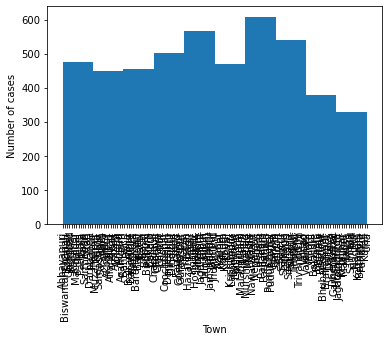

In [9]:
plt.hist(df["District"])
plt.xticks(rotation='vertical')
plt.ylabel('Number of cases')
plt.xlabel('Town')

In [10]:
original_data = df.copy(deep=True) # Make a deep copy, including a copy of the data and the indices

only_prices = df.drop(columns = ['Year', 'Month', 'District'])

x = 0
y = 0
changes = {}
nones = []
means = []

#print(df.iloc[15])

# iterate over rows in the prices table
for Index, row in only_prices.iterrows():
    row_changed = False
    median = row.median()
    mean_row = []
    for k in range(len(row)):
        mean_row.append(row[k])
        
    changed_values = []
    none_values = []

    # iterate over every value in the given row
    for i in range(31):
        try:
            
            if math.isnan(row[i]):
                none_values.append(i)
                row_changed = True
                
            # see if the values differ too much from the median
            elif (row[i] < median - 60) or (row[i] > median + 60): 
                
                #save the location of the value that needs changing
                changed_values.append(i)
                
                #create new row to calculate an accurate mean
                mean_row.remove(row[i])
                                
                row_changed = True
        except:
            print("error     error     error     error     error     error     error     error")
            continue
    
    if (row_changed):
        
        # if more than 5 values are missing from a row, then delete the whole row
        if len(none_values) > 5:
            nones.append(y)
        
        else: 
            mean_row  =[x for x in mean_row if math.isnan(x) == False]
            new_mean = round(sum(mean_row) / len(mean_row), 2)
            
            means.append(new_mean)
            
            for j in changed_values:
                df.iloc[y, j+3] = round(new_mean,2)

            for jj in none_values:
                df.iloc[y, jj+3] = round(new_mean,2)

            changes[y] = changed_values

            for ii in none_values:
                changes[y].append(ii)
    else:
        means.append(round(sum(mean_row) / len(mean_row), 2))
    
    y += 1


for kk in nones:
    df.drop(df.loc[df.index==kk].index, inplace=True)

df["Mean"] = means

print("Changes made: " + str(len(changes)))

#print(changes)

Changes made: 1702


In [11]:
df

Year      Month           District       1       2       3       4  \
18    2019      April               Agra   86.00   89.00   93.00   93.00   
19    2019      April              Ajmer   86.00   90.00   85.00   99.00   
20    2019      April           Akbarpur   92.00   98.00  104.00  105.00   
21    2019      April          Allahabad   92.00   98.00  102.00  102.00   
22    2019      April          Allahabad   90.00  101.00  102.00  102.00   
23    2019      April              Alwar   82.00   88.00   90.00   92.00   
24    2019      April             Ambala   82.00   85.00   88.00   92.00   
25    2019      April             Amethi   90.00   96.00  100.00  102.00   
26    2019      April              Anand  101.00  104.00  106.00  106.00   
27    2019      April              Arrah   96.00   96.00   96.00  108.00   
28    2019      April           Azamgarh   93.00  100.00  104.00  105.00   
29    2019      April           Bahraich   92.00  104.00  107.00  107.00   
31    2019      April          Balrampur   92.00  100.00  104.00  105.00   
32    2019      April          Bangalore  100.00   86.00   91.00   94.00   
33    2019      April            Bankura  103.00  104.00  105.00  106.00   
34    2019      April          Bardhaman  106.00  107.00  108.00  109.00   
36    2019      April              Barhi   92.00   94.00   97.00   98.00   
37    2019      April              Basti   93.00  100.00  104.00  105.00   
38    2019      April             Bhopal   90.00   95.00   95.00  100.00   
39    2019      April             Bhopal   90.00   95.00   95.00  100.00   
41    2019      April             Bokaro   95.00   95.00   97.00  100.00   
42    2019      April            Calicut   80.00   83.00   85.00   86.00   
44    2019      April            Chennai   80.00   83.00   86.00   89.00   
45    2019      April            Chirawa   84.00   85.00   90.00   90.00   
46    2019      April            Chittur   87.00   91.00   86.00   89.00   
47    2019      April             Cochin   77.00   82.00   85.00   86.00   
48    2019      April         Coochbehar   92.00   94.00   96.00   98.00   
49    2019      April          Darbhanga   96.00   96.00   96.00  108.00   
50    2019      April         Darjeeling   90.00   92.00   94.00   96.00   
51    2019      April           Dinajpur   95.00   97.00   99.00  101.00   
52    2019      April           Dindigul   80.00   82.00   84.00   85.00   
53    2019      April              Erode   80.00   82.00   84.00   86.00   
54    2019      April           Faizabad   92.00   98.00  102.00  102.00   
55    2019      April          Gorakhpur   95.00  100.00  105.00  106.00   
56    2019      April          Gurdaspur   82.00   85.00   90.00   92.00   
57    2019      April          Gurdaspur   82.00   86.00   90.00   90.00   
58    2019      April            Hajipur   96.00   96.00   96.00  108.00   
59    2019      April              Hansi   82.00   85.00   88.00   92.00   
60    2019      April             Hassan  100.00   88.00   93.00   96.00   
61    2019      April         Hazaribagh   92.00   94.00   97.00   98.00   
62    2019      April              Hisar   82.00   85.00   88.00   92.00   
63    2019      April            Hooghly  107.00  108.00  109.00  110.00   
64    2019      April         Hoshiarpur   82.00   85.00   90.00   92.00   
65    2019      April         Hoshiarpur   82.00   86.00   90.00   90.00   
66    2019      April             Indore   90.00   95.00   98.00  101.00   
67    2019      April             Indore   90.00   95.00   98.00  101.00   
68    2019      April           Jabalpur   94.00   94.00   98.00  100.00   
69    2019      April           Jabalpur   94.00   94.00   98.00  100.00   
70    2019      April         Jagdishpur   90.00   96.00  100.00  102.00   
71    2019      April         Jagdishpur   90.00   99.00  102.00  102.00   
72    2019      April             Jaipur   83.00   89.00   92.00   95.00   
73    2019      April         Jalpaiguri   90.00   92.

In [12]:
# ennustamine xgboost

for i in range(31):
    print(df.loc[df[str(i+1)].isnull() == True])

Empty DataFrame
Columns: [Year, Month, District, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, Mean]
Index: []

[0 rows x 35 columns]
Empty DataFrame
Columns: [Year, Month, District, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, Mean]
Index: []

[0 rows x 35 columns]
Empty DataFrame
Columns: [Year, Month, District, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, Mean]
Index: []

[0 rows x 35 columns]
Empty DataFrame
Columns: [Year, Month, District, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, Mean]
Index: []

[0 rows x 35 columns]
Empty DataFrame
Columns: [Year, Month, District, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, Mean]
Index: []

[0 rows

In [13]:
# https://github.com/thatisuday/indian-cities-database/blob/master/cities.json

tekst = """{"city":"Kolhapur", "state":"Maharashtra"},
	{"city":"Port Blair", "state":"Andaman & Nicobar Islands"},
	{"city":"Adilabad", "state":"Andhra Pradesh"},
	{"city":"Adoni", "state":"Andhra Pradesh"},
	{"city":"Amadalavalasa", "state":"Andhra Pradesh"},
	{"city":"Amalapuram", "state":"Andhra Pradesh"},
	{"city":"Anakapalle", "state":"Andhra Pradesh"},
	{"city":"Anantapur", "state":"Andhra Pradesh"},
	{"city":"Badepalle", "state":"Andhra Pradesh"},
	{"city":"Banganapalle", "state":"Andhra Pradesh"},
	{"city":"Bapatla", "state":"Andhra Pradesh"},
	{"city":"Bellampalle", "state":"Andhra Pradesh"},
	{"city":"Bethamcherla", "state":"Andhra Pradesh"},
	{"city":"Bhadrachalam", "state":"Andhra Pradesh"},
	{"city":"Bhainsa", "state":"Andhra Pradesh"},
	{"city":"Bheemunipatnam", "state":"Andhra Pradesh"},
	{"city":"Bhimavaram", "state":"Andhra Pradesh"},
	{"city":"Bhongir", "state":"Andhra Pradesh"},
	{"city":"Bobbili", "state":"Andhra Pradesh"},
	{"city":"Bodhan", "state":"Andhra Pradesh"},
	{"city":"Chilakaluripet", "state":"Andhra Pradesh"},
	{"city":"Chirala", "state":"Andhra Pradesh"},
	{"city":"Chittoor", "state":"Andhra Pradesh"},
	{"city":"Cuddapah", "state":"Andhra Pradesh"},
	{"city":"Devarakonda", "state":"Andhra Pradesh"},
	{"city":"Dharmavaram", "state":"Andhra Pradesh"},
	{"city":"Eluru", "state":"Andhra Pradesh"},
	{"city":"Farooqnagar", "state":"Andhra Pradesh"},
	{"city":"Gadwal", "state":"Andhra Pradesh"},
	{"city":"Gooty", "state":"Andhra Pradesh"},
	{"city":"Gudivada", "state":"Andhra Pradesh"},
	{"city":"Gudur", "state":"Andhra Pradesh"},
	{"city":"Guntakal", "state":"Andhra Pradesh"},
	{"city":"Guntur", "state":"Andhra Pradesh"},
	{"city":"Hanuman Junction", "state":"Andhra Pradesh"},
	{"city":"Hindupur", "state":"Andhra Pradesh"},
	{"city":"Hyderabad", "state":"Andhra Pradesh"},
	{"city":"Ichchapuram", "state":"Andhra Pradesh"},
	{"city":"Jaggaiahpet", "state":"Andhra Pradesh"},
	{"city":"Jagtial", "state":"Andhra Pradesh"},
	{"city":"Jammalamadugu", "state":"Andhra Pradesh"},
	{"city":"Jangaon", "state":"Andhra Pradesh"},
	{"city":"Kadapa", "state":"Andhra Pradesh"},
	{"city":"Kadiri", "state":"Andhra Pradesh"},
	{"city":"Kagaznagar", "state":"Andhra Pradesh"},
	{"city":"Kakinada", "state":"Andhra Pradesh"},
	{"city":"Kalyandurg", "state":"Andhra Pradesh"},
	{"city":"Kamareddy", "state":"Andhra Pradesh"},
	{"city":"Kandukur", "state":"Andhra Pradesh"},
	{"city":"Karimnagar", "state":"Andhra Pradesh"},
	{"city":"Kavali", "state":"Andhra Pradesh"},
	{"city":"Khammam", "state":"Andhra Pradesh"},
	{"city":"Koratla", "state":"Andhra Pradesh"},
	{"city":"Kothagudem", "state":"Andhra Pradesh"},
	{"city":"Kothapeta", "state":"Andhra Pradesh"},
	{"city":"Kovvur", "state":"Andhra Pradesh"},
	{"city":"Kurnool", "state":"Andhra Pradesh"},
	{"city":"Kyathampalle", "state":"Andhra Pradesh"},
	{"city":"Macherla", "state":"Andhra Pradesh"},
	{"city":"Machilipatnam", "state":"Andhra Pradesh"},
	{"city":"Madanapalle", "state":"Andhra Pradesh"},
	{"city":"Mahbubnagar", "state":"Andhra Pradesh"},
	{"city":"Mancherial", "state":"Andhra Pradesh"},
	{"city":"Mandamarri", "state":"Andhra Pradesh"},
	{"city":"Mandapeta", "state":"Andhra Pradesh"},
	{"city":"Manuguru", "state":"Andhra Pradesh"},
	{"city":"Markapur", "state":"Andhra Pradesh"},
	{"city":"Medak", "state":"Andhra Pradesh"},
	{"city":"Miryalaguda", "state":"Andhra Pradesh"},
	{"city":"Mogalthur", "state":"Andhra Pradesh"},
	{"city":"Nagari", "state":"Andhra Pradesh"},
	{"city":"Nagarkurnool", "state":"Andhra Pradesh"},
	{"city":"Nandyal", "state":"Andhra Pradesh"},
	{"city":"Narasapur", "state":"Andhra Pradesh"},
	{"city":"Narasaraopet", "state":"Andhra Pradesh"},
	{"city":"Narayanpet", "state":"Andhra Pradesh"},
	{"city":"Narsipatnam", "state":"Andhra Pradesh"},
	{"city":"Nellore", "state":"Andhra Pradesh"},
	{"city":"Nidadavole", "state":"Andhra Pradesh"},
	{"city":"Nirmal", "state":"Andhra Pradesh"},
	{"city":"Nizamabad", "state":"Andhra Pradesh"},
	{"city":"Nuzvid", "state":"Andhra Pradesh"},
	{"city":"Ongole", "state":"Andhra Pradesh"},
	{"city":"Palacole", "state":"Andhra Pradesh"},
	{"city":"Palasa Kasibugga", "state":"Andhra Pradesh"},
	{"city":"Palwancha", "state":"Andhra Pradesh"},
	{"city":"Parvathipuram", "state":"Andhra Pradesh"},
	{"city":"Pedana", "state":"Andhra Pradesh"},
	{"city":"Peddapuram", "state":"Andhra Pradesh"},
	{"city":"Pithapuram", "state":"Andhra Pradesh"},
	{"city":"Pondur", "state":"Andhra pradesh"},
	{"city":"Ponnur", "state":"Andhra Pradesh"},
	{"city":"Proddatur", "state":"Andhra Pradesh"},
	{"city":"Punganur", "state":"Andhra Pradesh"},
	{"city":"Puttur", "state":"Andhra Pradesh"},
	{"city":"Rajahmundry", "state":"Andhra Pradesh"},
	{"city":"Rajam", "state":"Andhra Pradesh"},
	{"city":"Ramachandrapuram", "state":"Andhra Pradesh"},
	{"city":"Ramagundam", "state":"Andhra Pradesh"},
	{"city":"Rayachoti", "state":"Andhra Pradesh"},
	{"city":"Rayadurg", "state":"Andhra Pradesh"},
	{"city":"Renigunta", "state":"Andhra Pradesh"},
	{"city":"Repalle", "state":"Andhra Pradesh"},
	{"city":"Sadasivpet", "state":"Andhra Pradesh"},
	{"city":"Salur", "state":"Andhra Pradesh"},
	{"city":"Samalkot", "state":"Andhra Pradesh"},
	{"city":"Sangareddy", "state":"Andhra Pradesh"},
	{"city":"Sattenapalle", "state":"Andhra Pradesh"},
	{"city":"Siddipet", "state":"Andhra Pradesh"},
	{"city":"Singapur", "state":"Andhra Pradesh"},
	{"city":"Sircilla", "state":"Andhra Pradesh"},
	{"city":"Srikakulam", "state":"Andhra Pradesh"},
	{"city":"Srikalahasti", "state":"Andhra Pradesh"},
	{"city":"Suryapet", "state":"Andhra Pradesh"},
	{"city":"Tadepalligudem", "state":"Andhra Pradesh"},
	{"city":"Tadpatri", "state":"Andhra Pradesh"},
	{"city":"Tandur", "state":"Andhra Pradesh"},
	{"city":"Tanuku", "state":"Andhra Pradesh"},
	{"city":"Tenali", "state":"Andhra Pradesh"},
	{"city":"Tirupati", "state":"Andhra Pradesh"},
	{"city":"Tuni", "state":"Andhra Pradesh"},
	{"city":"Uravakonda", "state":"Andhra Pradesh"},
	{"city":"Venkatagiri", "state":"Andhra Pradesh"},
	{"city":"Vicarabad", "state":"Andhra Pradesh"},
	{"city":"Vijayawada", "state":"Andhra Pradesh"},
	{"city":"Vinukonda", "state":"Andhra Pradesh"},
	{"city":"Visakhapatnam", "state":"Andhra Pradesh"},
	{"city":"Vizianagaram", "state":"Andhra Pradesh"},
	{"city":"Wanaparthy", "state":"Andhra Pradesh"},
	{"city":"Warangal", "state":"Andhra Pradesh"},
	{"city":"Yellandu", "state":"Andhra Pradesh"},
	{"city":"Yemmiganur", "state":"Andhra Pradesh"},
	{"city":"Yerraguntla", "state":"Andhra Pradesh"},
	{"city":"Zahirabad", "state":"Andhra Pradesh"},
	{"city":"Rajampet", "state":"Andhra Pradesh"},
	{"city":"Along", "state":"Arunachal Pradesh"},
	{"city":"Bomdila", "state":"Arunachal Pradesh"},
	{"city":"Itanagar", "state":"Arunachal Pradesh"},
	{"city":"Naharlagun", "state":"Arunachal Pradesh"},
	{"city":"Pasighat", "state":"Arunachal Pradesh"},
	{"city":"Abhayapuri", "state":"Assam"},
	{"city":"Amguri", "state":"Assam"},
	{"city":"Anandnagaar", "state":"Assam"},
	{"city":"Barpeta", "state":"Assam"},
	{"city":"Barpeta Road", "state":"Assam"},
	{"city":"Bilasipara", "state":"Assam"},
	{"city":"Bongaigaon", "state":"Assam"},
	{"city":"Dhekiajuli", "state":"Assam"},
	{"city":"Dhubri", "state":"Assam"},
	{"city":"Dibrugarh", "state":"Assam"},
	{"city":"Digboi", "state":"Assam"},
	{"city":"Diphu", "state":"Assam"},
	{"city":"Dispur", "state":"Assam"},
	{"city":"Gauripur", "state":"Assam"},
	{"city":"Goalpara", "state":"Assam"},
	{"city":"Golaghat", "state":"Assam"},
	{"city":"Guwahati", "state":"Assam"},
	{"city":"Haflong", "state":"Assam"},
	{"city":"Hailakandi", "state":"Assam"},
	{"city":"Hojai", "state":"Assam"},
	{"city":"Jorhat", "state":"Assam"},
	{"city":"Karimganj", "state":"Assam"},
	{"city":"Kokrajhar", "state":"Assam"},
	{"city":"Lanka", "state":"Assam"},
	{"city":"Lumding", "state":"Assam"},
	{"city":"Mangaldoi", "state":"Assam"},
	{"city":"Mankachar", "state":"Assam"},
	{"city":"Margherita", "state":"Assam"},
	{"city":"Mariani", "state":"Assam"},
	{"city":"Marigaon", "state":"Assam"},
	{"city":"Nagaon", "state":"Assam"},
	{"city":"Nalbari", "state":"Assam"},
	{"city":"North Lakhimpur", "state":"Assam"},
	{"city":"Rangia", "state":"Assam"},
	{"city":"Sibsagar", "state":"Assam"},
	{"city":"Silapathar", "state":"Assam"},
	{"city":"Silchar", "state":"Assam"},
	{"city":"Tezpur", "state":"Assam"},
	{"city":"Tinsukia", "state":"Assam"},
	{"city":"Amarpur", "state":"Bihar"},
	{"city":"Araria", "state":"Bihar"},
	{"city":"Areraj", "state":"Bihar"},
	{"city":"Arrah", "state":"Bihar"},
	{"city":"Asarganj", "state":"Bihar"},
	{"city":"Aurangabad", "state":"Bihar"},
	{"city":"Bagaha", "state":"Bihar"},
	{"city":"Bahadurganj", "state":"Bihar"},
	{"city":"Bairgania", "state":"Bihar"},
	{"city":"Bakhtiarpur", "state":"Bihar"},
	{"city":"Banka", "state":"Bihar"},
	{"city":"Banmankhi Bazar", "state":"Bihar"},
	{"city":"Barahiya", "state":"Bihar"},
	{"city":"Barauli", "state":"Bihar"},
	{"city":"Barbigha", "state":"Bihar"},
	{"city":"Barh", "state":"Bihar"},
	{"city":"Begusarai", "state":"Bihar"},
	{"city":"Behea", "state":"Bihar"},
	{"city":"Bettiah", "state":"Bihar"},
	{"city":"Bhabua", "state":"Bihar"},
	{"city":"Bhagalpur", "state":"Bihar"},
	{"city":"Bihar Sharif", "state":"Bihar"},
	{"city":"Bikramganj", "state":"Bihar"},
	{"city":"Bodh Gaya", "state":"Bihar"},
	{"city":"Buxar", "state":"Bihar"},
	{"city":"Chandan Bara", "state":"Bihar"},
	{"city":"Chanpatia", "state":"Bihar"},
	{"city":"Chhapra", "state":"Bihar"},
	{"city":"Colgong", "state":"Bihar"},
	{"city":"Dalsinghsarai", "state":"Bihar"},
	{"city":"Darbhanga", "state":"Bihar"},
	{"city":"Daudnagar", "state":"Bihar"},
	{"city":"Dehri-on-Sone", "state":"Bihar"},
	{"city":"Dhaka", "state":"Bihar"},
	{"city":"Dighwara", "state":"Bihar"},
	{"city":"Dumraon", "state":"Bihar"},
	{"city":"Fatwah", "state":"Bihar"},
	{"city":"Forbesganj", "state":"Bihar"},
	{"city":"Gaya", "state":"Bihar"},
	{"city":"Gogri Jamalpur", "state":"Bihar"},
	{"city":"Gopalganj", "state":"Bihar"},
	{"city":"Hajipur", "state":"Bihar"},
	{"city":"Hilsa", "state":"Bihar"},
	{"city":"Hisua", "state":"Bihar"},
	{"city":"Islampur", "state":"Bihar"},
	{"city":"Jagdispur", "state":"Bihar"},
	{"city":"Jamalpur", "state":"Bihar"},
	{"city":"Jamui", "state":"Bihar"},
	{"city":"Jehanabad", "state":"Bihar"},
	{"city":"Jhajha", "state":"Bihar"},
	{"city":"Jhanjharpur", "state":"Bihar"},
	{"city":"Jogabani", "state":"Bihar"},
	{"city":"Kanti", "state":"Bihar"},
	{"city":"Katihar", "state":"Bihar"},
	{"city":"Khagaria", "state":"Bihar"},
	{"city":"Kharagpur", "state":"Bihar"},
	{"city":"Kishanganj", "state":"Bihar"},
	{"city":"Lakhisarai", "state":"Bihar"},
	{"city":"Lalganj", "state":"Bihar"},
	{"city":"Madhepura", "state":"Bihar"},
	{"city":"Madhubani", "state":"Bihar"},
	{"city":"Maharajganj", "state":"Bihar"},
	{"city":"Mahnar Bazar", "state":"Bihar"},
	{"city":"Makhdumpur", "state":"Bihar"},
	{"city":"Maner", "state":"Bihar"},
	{"city":"Manihari", "state":"Bihar"},
	{"city":"Marhaura", "state":"Bihar"},
	{"city":"Masaurhi", "state":"Bihar"},
	{"city":"Mirganj", "state":"Bihar"},
	{"city":"Mokameh", "state":"Bihar"},
	{"city":"Motihari", "state":"Bihar"},
	{"city":"Motipur", "state":"Bihar"},
	{"city":"Munger", "state":"Bihar"},
	{"city":"Murliganj", "state":"Bihar"},
	{"city":"Muzaffarpur", "state":"Bihar"},
	{"city":"Narkatiaganj", "state":"Bihar"},
	{"city":"Naugachhia", "state":"Bihar"},
	{"city":"Nawada", "state":"Bihar"},
	{"city":"Nokha", "state":"Bihar"},
	{"city":"Patna", "state":"Bihar"},
	{"city":"Piro", "state":"Bihar"},
	{"city":"Purnia", "state":"Bihar"},
	{"city":"Rafiganj", "state":"Bihar"},
	{"city":"Rajgir", "state":"Bihar"},
	{"city":"Ramnagar", "state":"Bihar"},
	{"city":"Raxaul Bazar", "state":"Bihar"},
	{"city":"Revelganj", "state":"Bihar"},
	{"city":"Rosera", "state":"Bihar"},
	{"city":"Saharsa", "state":"Bihar"},
	{"city":"Samastipur", "state":"Bihar"},
	{"city":"Sasaram", "state":"Bihar"},
	{"city":"Sheikhpura", "state":"Bihar"},
	{"city":"Sheohar", "state":"Bihar"},
	{"city":"Sherghati", "state":"Bihar"},
	{"city":"Silao", "state":"Bihar"},
	{"city":"Sitamarhi", "state":"Bihar"},
	{"city":"Siwan", "state":"Bihar"},
	{"city":"Sonepur", "state":"Bihar"},
	{"city":"Sugauli", "state":"Bihar"},
	{"city":"Sultanganj", "state":"Bihar"},
	{"city":"Supaul", "state":"Bihar"},
	{"city":"Warisaliganj", "state":"Bihar"},
	{"city":"Ahiwara", "state":"Chhattisgarh"},
	{"city":"Akaltara", "state":"Chhattisgarh"},
	{"city":"Ambagarh Chowki", "state":"Chhattisgarh"},
	{"city":"Ambikapur", "state":"Chhattisgarh"},
	{"city":"Arang", "state":"Chhattisgarh"},
	{"city":"Bade Bacheli", "state":"Chhattisgarh"},
	{"city":"Balod", "state":"Chhattisgarh"},
	{"city":"Baloda Bazar", "state":"Chhattisgarh"},
	{"city":"Bemetra", "state":"Chhattisgarh"},
	{"city":"Bhatapara", "state":"Chhattisgarh"},
	{"city":"Bilaspur", "state":"Chhattisgarh"},
	{"city":"Birgaon", "state":"Chhattisgarh"},
	{"city":"Champa", "state":"Chhattisgarh"},
	{"city":"Chirmiri", "state":"Chhattisgarh"},
	{"city":"Dalli-Rajhara", "state":"Chhattisgarh"},
	{"city":"Dhamtari", "state":"Chhattisgarh"},
	{"city":"Dipka", "state":"Chhattisgarh"},
	{"city":"Dongargarh", "state":"Chhattisgarh"},
	{"city":"Durg-Bhilai Nagar", "state":"Chhattisgarh"},
	{"city":"Gobranawapara", "state":"Chhattisgarh"},
	{"city":"Jagdalpur", "state":"Chhattisgarh"},
	{"city":"Janjgir", "state":"Chhattisgarh"},
	{"city":"Jashpurnagar", "state":"Chhattisgarh"},
	{"city":"Kanker", "state":"Chhattisgarh"},
	{"city":"Kawardha", "state":"Chhattisgarh"},
	{"city":"Kondagaon", "state":"Chhattisgarh"},
	{"city":"Korba", "state":"Chhattisgarh"},
	{"city":"Mahasamund", "state":"Chhattisgarh"},
	{"city":"Mahendragarh", "state":"Chhattisgarh"},
	{"city":"Mungeli", "state":"Chhattisgarh"},
	{"city":"Naila Janjgir", "state":"Chhattisgarh"},
	{"city":"Raigarh", "state":"Chhattisgarh"},
	{"city":"Raipur", "state":"Chhattisgarh"},
	{"city":"Rajnandgaon", "state":"Chhattisgarh"},
	{"city":"Sakti", "state":"Chhattisgarh"},
	{"city":"Tilda Newra", "state":"Chhattisgarh"},
	{"city":"Amli", "state":"Dadra & Nagar Haveli"},
	{"city":"Silvassa", "state":"Dadra & Nagar Haveli"},
	{"city":"Daman and Diu", "state":"Daman & Diu"},
	{"city":"Daman and Diu", "state":"Daman & Diu"},
	{"city":"Asola", "state":"Delhi"},
	{"city":"Delhi", "state":"Delhi"},
	{"city":"Aldona", "state":"Goa"},
	{"city":"Curchorem Cacora", "state":"Goa"},
	{"city":"Madgaon", "state":"Goa"},
	{"city":"Mapusa", "state":"Goa"},
	{"city":"Margao", "state":"Goa"},
	{"city":"Marmagao", "state":"Goa"},
	{"city":"Panaji", "state":"Goa"},
	{"city":"Ahmedabad", "state":"Gujarat"},
	{"city":"Amreli", "state":"Gujarat"},
	{"city":"Anand", "state":"Gujarat"},
	{"city":"Ankleshwar", "state":"Gujarat"},
	{"city":"Bharuch", "state":"Gujarat"},
	{"city":"Bhavnagar", "state":"Gujarat"},
	{"city":"Bhuj", "state":"Gujarat"},
	{"city":"Cambay", "state":"Gujarat"},
	{"city":"Dahod", "state":"Gujarat"},
	{"city":"Deesa", "state":"Gujarat"},
	{"city":"Dharampur", "state":" India"},
	{"city":"Dholka", "state":"Gujarat"},
	{"city":"Gandhinagar", "state":"Gujarat"},
	{"city":"Godhra", "state":"Gujarat"},
	{"city":"Himatnagar", "state":"Gujarat"},
	{"city":"Idar", "state":"Gujarat"},
	{"city":"Jamnagar", "state":"Gujarat"},
	{"city":"Junagadh", "state":"Gujarat"},
	{"city":"Kadi", "state":"Gujarat"},
	{"city":"Kalavad", "state":"Gujarat"},
	{"city":"Kalol", "state":"Gujarat"},
	{"city":"Kapadvanj", "state":"Gujarat"},
	{"city":"Karjan", "state":"Gujarat"},
	{"city":"Keshod", "state":"Gujarat"},
	{"city":"Khambhalia", "state":"Gujarat"},
	{"city":"Khambhat", "state":"Gujarat"},
	{"city":"Kheda", "state":"Gujarat"},
	{"city":"Khedbrahma", "state":"Gujarat"},
	{"city":"Kheralu", "state":"Gujarat"},
	{"city":"Kodinar", "state":"Gujarat"},
	{"city":"Lathi", "state":"Gujarat"},
	{"city":"Limbdi", "state":"Gujarat"},
	{"city":"Lunawada", "state":"Gujarat"},
	{"city":"Mahesana", "state":"Gujarat"},
	{"city":"Mahuva", "state":"Gujarat"},
	{"city":"Manavadar", "state":"Gujarat"},
	{"city":"Mandvi", "state":"Gujarat"},
	{"city":"Mangrol", "state":"Gujarat"},
	{"city":"Mansa", "state":"Gujarat"},
	{"city":"Mehmedabad", "state":"Gujarat"},
	{"city":"Modasa", "state":"Gujarat"},
	{"city":"Morvi", "state":"Gujarat"},
	{"city":"Nadiad", "state":"Gujarat"},
	{"city":"Navsari", "state":"Gujarat"},
	{"city":"Padra", "state":"Gujarat"},
	{"city":"Palanpur", "state":"Gujarat"},
	{"city":"Palitana", "state":"Gujarat"},
	{"city":"Pardi", "state":"Gujarat"},
	{"city":"Patan", "state":"Gujarat"},
	{"city":"Petlad", "state":"Gujarat"},
	{"city":"Porbandar", "state":"Gujarat"},
	{"city":"Radhanpur", "state":"Gujarat"},
	{"city":"Rajkot", "state":"Gujarat"},
	{"city":"Rajpipla", "state":"Gujarat"},
	{"city":"Rajula", "state":"Gujarat"},
	{"city":"Ranavav", "state":"Gujarat"},
	{"city":"Rapar", "state":"Gujarat"},
	{"city":"Salaya", "state":"Gujarat"},
	{"city":"Sanand", "state":"Gujarat"},
	{"city":"Savarkundla", "state":"Gujarat"},
	{"city":"Sidhpur", "state":"Gujarat"},
	{"city":"Sihor", "state":"Gujarat"},
	{"city":"Songadh", "state":"Gujarat"},
	{"city":"Surat", "state":"Gujarat"},
	{"city":"Talaja", "state":"Gujarat"},
	{"city":"Thangadh", "state":"Gujarat"},
	{"city":"Tharad", "state":"Gujarat"},
	{"city":"Umbergaon", "state":"Gujarat"},
	{"city":"Umreth", "state":"Gujarat"},
	{"city":"Una", "state":"Gujarat"},
	{"city":"Unjha", "state":"Gujarat"},
	{"city":"Upleta", "state":"Gujarat"},
	{"city":"Vadnagar", "state":"Gujarat"},
	{"city":"Vadodara", "state":"Gujarat"},
	{"city":"Valsad", "state":"Gujarat"},
	{"city":"Vapi", "state":"Gujarat"},
	{"city":"Vapi", "state":"Gujarat"},
	{"city":"Veraval", "state":"Gujarat"},
	{"city":"Vijapur", "state":"Gujarat"},
	{"city":"Viramgam", "state":"Gujarat"},
	{"city":"Visnagar", "state":"Gujarat"},
	{"city":"Vyara", "state":"Gujarat"},
	{"city":"Wadhwan", "state":"Gujarat"},
	{"city":"Wankaner", "state":"Gujarat"},
	{"city":"Adalaj", "state":"Gujrat"},
	{"city":"Adityana", "state":"Gujrat"},
	{"city":"Alang", "state":"Gujrat"},
	{"city":"Ambaji", "state":"Gujrat"},
	{"city":"Ambaliyasan", "state":"Gujrat"},
	{"city":"Andada", "state":"Gujrat"},
	{"city":"Anjar", "state":"Gujrat"},
	{"city":"Anklav", "state":"Gujrat"},
	{"city":"Antaliya", "state":"Gujrat"},
	{"city":"Arambhada", "state":"Gujrat"},
	{"city":"Atul", "state":"Gujrat"},
	{"city":"Ballabhgarh", "state":"Hariyana"},
	{"city":"Ambala", "state":"Haryana"},
	{"city":"Ambala", "state":"Haryana"},
	{"city":"Asankhurd", "state":"Haryana"},
	{"city":"Assandh", "state":"Haryana"},
	{"city":"Ateli", "state":"Haryana"},
	{"city":"Babiyal", "state":"Haryana"},
	{"city":"Bahadurgarh", "state":"Haryana"},
	{"city":"Barwala", "state":"Haryana"},
	{"city":"Bhiwani", "state":"Haryana"},
	{"city":"Charkhi Dadri", "state":"Haryana"},
	{"city":"Cheeka", "state":"Haryana"},
	{"city":"Ellenabad 2", "state":"Haryana"},
	{"city":"Faridabad", "state":"Haryana"},
	{"city":"Fatehabad", "state":"Haryana"},
	{"city":"Ganaur", "state":"Haryana"},
	{"city":"Gharaunda", "state":"Haryana"},
	{"city":"Gohana", "state":"Haryana"},
	{"city":"Gurgaon", "state":"Haryana"},
	{"city":"Haibat(Yamuna Nagar)", "state":"Haryana"},
	{"city":"Hansi", "state":"Haryana"},
	{"city":"Hisar", "state":"Haryana"},
	{"city":"Hodal", "state":"Haryana"},
	{"city":"Jhajjar", "state":"Haryana"},
	{"city":"Jind", "state":"Haryana"},
	{"city":"Kaithal", "state":"Haryana"},
	{"city":"Kalan Wali", "state":"Haryana"},
	{"city":"Kalka", "state":"Haryana"},
	{"city":"Karnal", "state":"Haryana"},
	{"city":"Ladwa", "state":"Haryana"},
	{"city":"Mahendragarh", "state":"Haryana"},
	{"city":"Mandi Dabwali", "state":"Haryana"},
	{"city":"Narnaul", "state":"Haryana"},
	{"city":"Narwana", "state":"Haryana"},
	{"city":"Palwal", "state":"Haryana"},
	{"city":"Panchkula", "state":"Haryana"},
	{"city":"Panipat", "state":"Haryana"},
	{"city":"Pehowa", "state":"Haryana"},
	{"city":"Pinjore", "state":"Haryana"},
	{"city":"Rania", "state":"Haryana"},
	{"city":"Ratia", "state":"Haryana"},
	{"city":"Rewari", "state":"Haryana"},
	{"city":"Rohtak", "state":"Haryana"},
	{"city":"Safidon", "state":"Haryana"},
	{"city":"Samalkha", "state":"Haryana"},
	{"city":"Shahbad", "state":"Haryana"},
	{"city":"Sirsa", "state":"Haryana"},
	{"city":"Sohna", "state":"Haryana"},
	{"city":"Sonipat", "state":"Haryana"},
	{"city":"Taraori", "state":"Haryana"},
	{"city":"Thanesar", "state":"Haryana"},
	{"city":"Tohana", "state":"Haryana"},
	{"city":"Yamunanagar", "state":"Haryana"},
	{"city":"Arki", "state":"Himachal Pradesh"},
	{"city":"Baddi", "state":"Himachal Pradesh"},
	{"city":"Bilaspur", "state":"Himachal Pradesh"},
	{"city":"Chamba", "state":"Himachal Pradesh"},
	{"city":"Dalhousie", "state":"Himachal Pradesh"},
	{"city":"Dharamsala", "state":"Himachal Pradesh"},
	{"city":"Hamirpur", "state":"Himachal Pradesh"},
	{"city":"Mandi", "state":"Himachal Pradesh"},
	{"city":"Nahan", "state":"Himachal Pradesh"},
	{"city":"Shimla", "state":"Himachal Pradesh"},
	{"city":"Solan", "state":"Himachal Pradesh"},
	{"city":"Sundarnagar", "state":"Himachal Pradesh"},
	{"city":"Jammu", "state":"Jammu & Kashmir"},
	{"city":"Achabbal", "state":"Jammu & Kashmir"},
	{"city":"Akhnoor", "state":"Jammu & Kashmir"},
	{"city":"Anantnag", "state":"Jammu & Kashmir"},
	{"city":"Arnia", "state":"Jammu & Kashmir"},
	{"city":"Awantipora", "state":"Jammu & Kashmir"},
	{"city":"Bandipore", "state":"Jammu & Kashmir"},
	{"city":"Baramula", "state":"Jammu & Kashmir"},
	{"city":"Kathua", "state":"Jammu & Kashmir"},
	{"city":"Leh", "state":"Jammu & Kashmir"},
	{"city":"Punch", "state":"Jammu & Kashmir"},
	{"city":"Rajauri", "state":"Jammu & Kashmir"},
	{"city":"Sopore", "state":"Jammu & Kashmir"},
	{"city":"Srinagar", "state":"Jammu & Kashmir"},
	{"city":"Udhampur", "state":"Jammu & Kashmir"},
	{"city":"Amlabad", "state":"Jharkhand"},
	{"city":"Ara", "state":"Jharkhand"},
	{"city":"Barughutu", "state":"Jharkhand"},
	{"city":"Bokaro Steel City", "state":"Jharkhand"},
	{"city":"Chaibasa", "state":"Jharkhand"},
	{"city":"Chakradharpur", "state":"Jharkhand"},
	{"city":"Chandrapura", "state":"Jharkhand"},
	{"city":"Chatra", "state":"Jharkhand"},
	{"city":"Chirkunda", "state":"Jharkhand"},
	{"city":"Churi", "state":"Jharkhand"},
	{"city":"Daltonganj", "state":"Jharkhand"},
	{"city":"Deoghar", "state":"Jharkhand"},
	{"city":"Dhanbad", "state":"Jharkhand"},
	{"city":"Dumka", "state":"Jharkhand"},
	{"city":"Garhwa", "state":"Jharkhand"},
	{"city":"Ghatshila", "state":"Jharkhand"},
	{"city":"Giridih", "state":"Jharkhand"},
	{"city":"Godda", "state":"Jharkhand"},
	{"city":"Gomoh", "state":"Jharkhand"},
	{"city":"Gumia", "state":"Jharkhand"},
	{"city":"Gumla", "state":"Jharkhand"},
	{"city":"Hazaribag", "state":"Jharkhand"},
	{"city":"Hussainabad", "state":"Jharkhand"},
	{"city":"Jamshedpur", "state":"Jharkhand"},
	{"city":"Jamtara", "state":"Jharkhand"},
	{"city":"Jhumri Tilaiya", "state":"Jharkhand"},
	{"city":"Khunti", "state":"Jharkhand"},
	{"city":"Lohardaga", "state":"Jharkhand"},
	{"city":"Madhupur", "state":"Jharkhand"},
	{"city":"Mihijam", "state":"Jharkhand"},
	{"city":"Musabani", "state":"Jharkhand"},
	{"city":"Pakaur", "state":"Jharkhand"},
	{"city":"Patratu", "state":"Jharkhand"},
	{"city":"Phusro", "state":"Jharkhand"},
	{"city":"Ramngarh", "state":"Jharkhand"},
	{"city":"Ranchi", "state":"Jharkhand"},
	{"city":"Sahibganj", "state":"Jharkhand"},
	{"city":"Saunda", "state":"Jharkhand"},
	{"city":"Simdega", "state":"Jharkhand"},
	{"city":"Tenu Dam-cum- Kathhara", "state":"Jharkhand"},
	{"city":"Arasikere", "state":"Karnataka"},
	{"city":"Bangalore", "state":"Karnataka"},
	{"city":"Belgaum", "state":"Karnataka"},
	{"city":"Bellary", "state":"Karnataka"},
	{"city":"Chamrajnagar", "state":"Karnataka"},
	{"city":"Chikkaballapur", "state":"Karnataka"},
	{"city":"Chintamani", "state":"Karnataka"},
	{"city":"Chitradurga", "state":"Karnataka"},
	{"city":"Gulbarga", "state":"Karnataka"},
	{"city":"Gundlupet", "state":"Karnataka"},
	{"city":"Hassan", "state":"Karnataka"},
	{"city":"Hospet", "state":"Karnataka"},
	{"city":"Hubli", "state":"Karnataka"},
	{"city":"Karkala", "state":"Karnataka"},
	{"city":"Karwar", "state":"Karnataka"},
	{"city":"Kolar", "state":"Karnataka"},
	{"city":"Kota", "state":"Karnataka"},
	{"city":"Lakshmeshwar", "state":"Karnataka"},
	{"city":"Lingsugur", "state":"Karnataka"},
	{"city":"Maddur", "state":"Karnataka"},
	{"city":"Madhugiri", "state":"Karnataka"},
	{"city":"Madikeri", "state":"Karnataka"},
	{"city":"Magadi", "state":"Karnataka"},
	{"city":"Mahalingpur", "state":"Karnataka"},
	{"city":"Malavalli", "state":"Karnataka"},
	{"city":"Malur", "state":"Karnataka"},
	{"city":"Mandya", "state":"Karnataka"},
	{"city":"Mangalore", "state":"Karnataka"},
	{"city":"Manvi", "state":"Karnataka"},
	{"city":"Mudalgi", "state":"Karnataka"},
	{"city":"Mudbidri", "state":"Karnataka"},
	{"city":"Muddebihal", "state":"Karnataka"},
	{"city":"Mudhol", "state":"Karnataka"},
	{"city":"Mulbagal", "state":"Karnataka"},
	{"city":"Mundargi", "state":"Karnataka"},
	{"city":"Mysore", "state":"Karnataka"},
	{"city":"Nanjangud", "state":"Karnataka"},
	{"city":"Pavagada", "state":"Karnataka"},
	{"city":"Puttur", "state":"Karnataka"},
	{"city":"Rabkavi Banhatti", "state":"Karnataka"},
	{"city":"Raichur", "state":"Karnataka"},
	{"city":"Ramanagaram", "state":"Karnataka"},
	{"city":"Ramdurg", "state":"Karnataka"},
	{"city":"Ranibennur", "state":"Karnataka"},
	{"city":"Robertson Pet", "state":"Karnataka"},
	{"city":"Ron", "state":"Karnataka"},
	{"city":"Sadalgi", "state":"Karnataka"},
	{"city":"Sagar", "state":"Karnataka"},
	{"city":"Sakleshpur", "state":"Karnataka"},
	{"city":"Sandur", "state":"Karnataka"},
	{"city":"Sankeshwar", "state":"Karnataka"},
	{"city":"Saundatti-Yellamma", "state":"Karnataka"},
	{"city":"Savanur", "state":"Karnataka"},
	{"city":"Sedam", "state":"Karnataka"},
	{"city":"Shahabad", "state":"Karnataka"},
	{"city":"Shahpur", "state":"Karnataka"},
	{"city":"Shiggaon", "state":"Karnataka"},
	{"city":"Shikapur", "state":"Karnataka"},
	{"city":"Shimoga", "state":"Karnataka"},
	{"city":"Shorapur", "state":"Karnataka"},
	{"city":"Shrirangapattana", "state":"Karnataka"},
	{"city":"Sidlaghatta", "state":"Karnataka"},
	{"city":"Sindgi", "state":"Karnataka"},
	{"city":"Sindhnur", "state":"Karnataka"},
	{"city":"Sira", "state":"Karnataka"},
	{"city":"Sirsi", "state":"Karnataka"},
	{"city":"Siruguppa", "state":"Karnataka"},
	{"city":"Srinivaspur", "state":"Karnataka"},
	{"city":"Talikota", "state":"Karnataka"},
	{"city":"Tarikere", "state":"Karnataka"},
	{"city":"Tekkalakota", "state":"Karnataka"},
	{"city":"Terdal", "state":"Karnataka"},
	{"city":"Tiptur", "state":"Karnataka"},
	{"city":"Tumkur", "state":"Karnataka"},
	{"city":"Udupi", "state":"Karnataka"},
	{"city":"Vijayapura", "state":"Karnataka"},
	{"city":"Wadi", "state":"Karnataka"},
	{"city":"Yadgir", "state":"Karnataka"},
	{"city":"Adoor", "state":"Kerala"},
	{"city":"Akathiyoor", "state":"Kerala"},
	{"city":"Alappuzha", "state":"Kerala"},
	{"city":"Ancharakandy", "state":"Kerala"},
	{"city":"Aroor", "state":"Kerala"},
	{"city":"Ashtamichira", "state":"Kerala"},
	{"city":"Attingal", "state":"Kerala"},
	{"city":"Avinissery", "state":"Kerala"},
	{"city":"Chalakudy", "state":"Kerala"},
	{"city":"Changanassery", "state":"Kerala"},
	{"city":"Chendamangalam", "state":"Kerala"},
	{"city":"Chengannur", "state":"Kerala"},
	{"city":"Cherthala", "state":"Kerala"},
	{"city":"Cheruthazham", "state":"Kerala"},
	{"city":"Chittur-Thathamangalam", "state":"Kerala"},
	{"city":"Chockli", "state":"Kerala"},
	{"city":"Erattupetta", "state":"Kerala"},
	{"city":"Guruvayoor", "state":"Kerala"},
	{"city":"Irinjalakuda", "state":"Kerala"},
	{"city":"Kadirur", "state":"Kerala"},
	{"city":"Kalliasseri", "state":"Kerala"},
	{"city":"Kalpetta", "state":"Kerala"},
	{"city":"Kanhangad", "state":"Kerala"},
	{"city":"Kanjikkuzhi", "state":"Kerala"},
	{"city":"Kannur", "state":"Kerala"},
	{"city":"Kasaragod", "state":"Kerala"},
	{"city":"Kayamkulam", "state":"Kerala"},
	{"city":"Kochi", "state":"Kerala"},
	{"city":"Kodungallur", "state":"Kerala"},
	{"city":"Kollam", "state":"Kerala"},
	{"city":"Koothuparamba", "state":"Kerala"},
	{"city":"Kothamangalam", "state":"Kerala"},
	{"city":"Kottayam", "state":"Kerala"},
	{"city":"Kozhikode", "state":"Kerala"},
	{"city":"Kunnamkulam", "state":"Kerala"},
	{"city":"Malappuram", "state":"Kerala"},
	{"city":"Mattannur", "state":"Kerala"},
	{"city":"Mavelikkara", "state":"Kerala"},
	{"city":"Mavoor", "state":"Kerala"},
	{"city":"Muvattupuzha", "state":"Kerala"},
	{"city":"Nedumangad", "state":"Kerala"},
	{"city":"Neyyattinkara", "state":"Kerala"},
	{"city":"Ottappalam", "state":"Kerala"},
	{"city":"Palai", "state":"Kerala"},
	{"city":"Palakkad", "state":"Kerala"},
	{"city":"Panniyannur", "state":"Kerala"},
	{"city":"Pappinisseri", "state":"Kerala"},
	{"city":"Paravoor", "state":"Kerala"},
	{"city":"Pathanamthitta", "state":"Kerala"},
	{"city":"Payyannur", "state":"Kerala"},
	{"city":"Peringathur", "state":"Kerala"},
	{"city":"Perinthalmanna", "state":"Kerala"},
	{"city":"Perumbavoor", "state":"Kerala"},
	{"city":"Ponnani", "state":"Kerala"},
	{"city":"Punalur", "state":"Kerala"},
	{"city":"Quilandy", "state":"Kerala"},
	{"city":"Shoranur", "state":"Kerala"},
	{"city":"Taliparamba", "state":"Kerala"},
	{"city":"Thiruvalla", "state":"Kerala"},
	{"city":"Thiruvananthapuram", "state":"Kerala"},
	{"city":"Thodupuzha", "state":"Kerala"},
	{"city":"Thrissur", "state":"Kerala"},
	{"city":"Tirur", "state":"Kerala"},
	{"city":"Vadakara", "state":"Kerala"},
	{"city":"Vaikom", "state":"Kerala"},
	{"city":"Varkala", "state":"Kerala"},
	{"city":"Kavaratti", "state":"Lakshadweep"},
	{"city":"Ashok Nagar", "state":"Madhya Pradesh"},
	{"city":"Balaghat", "state":"Madhya Pradesh"},
	{"city":"Betul", "state":"Madhya Pradesh"},
	{"city":"Bhopal", "state":"Madhya Pradesh"},
	{"city":"Burhanpur", "state":"Madhya Pradesh"},
	{"city":"Chhatarpur", "state":"Madhya Pradesh"},
	{"city":"Dabra", "state":"Madhya Pradesh"},
	{"city":"Datia", "state":"Madhya Pradesh"},
	{"city":"Dewas", "state":"Madhya Pradesh"},
	{"city":"Dhar", "state":"Madhya Pradesh"},
	{"city":"Fatehabad", "state":"Madhya Pradesh"},
	{"city":"Gwalior", "state":"Madhya Pradesh"},
	{"city":"Indore", "state":"Madhya Pradesh"},
	{"city":"Itarsi", "state":"Madhya Pradesh"},
	{"city":"Jabalpur", "state":"Madhya Pradesh"},
	{"city":"Katni", "state":"Madhya Pradesh"},
	{"city":"Kotma", "state":"Madhya Pradesh"},
	{"city":"Lahar", "state":"Madhya Pradesh"},
	{"city":"Lundi", "state":"Madhya Pradesh"},
	{"city":"Maharajpur", "state":"Madhya Pradesh"},
	{"city":"Mahidpur", "state":"Madhya Pradesh"},
	{"city":"Maihar", "state":"Madhya Pradesh"},
	{"city":"Malajkhand", "state":"Madhya Pradesh"},
	{"city":"Manasa", "state":"Madhya Pradesh"},
	{"city":"Manawar", "state":"Madhya Pradesh"},
	{"city":"Mandideep", "state":"Madhya Pradesh"},
	{"city":"Mandla", "state":"Madhya Pradesh"},
	{"city":"Mandsaur", "state":"Madhya Pradesh"},
	{"city":"Mauganj", "state":"Madhya Pradesh"},
	{"city":"Mhow Cantonment", "state":"Madhya Pradesh"},
	{"city":"Mhowgaon", "state":"Madhya Pradesh"},
	{"city":"Morena", "state":"Madhya Pradesh"},
	{"city":"Multai", "state":"Madhya Pradesh"},
	{"city":"Murwara", "state":"Madhya Pradesh"},
	{"city":"Nagda", "state":"Madhya Pradesh"},
	{"city":"Nainpur", "state":"Madhya Pradesh"},
	{"city":"Narsinghgarh", "state":"Madhya Pradesh"},
	{"city":"Narsinghgarh", "state":"Madhya Pradesh"},
	{"city":"Neemuch", "state":"Madhya Pradesh"},
	{"city":"Nepanagar", "state":"Madhya Pradesh"},
	{"city":"Niwari", "state":"Madhya Pradesh"},
	{"city":"Nowgong", "state":"Madhya Pradesh"},
	{"city":"Nowrozabad", "state":"Madhya Pradesh"},
	{"city":"Pachore", "state":"Madhya Pradesh"},
	{"city":"Pali", "state":"Madhya Pradesh"},
	{"city":"Panagar", "state":"Madhya Pradesh"},
	{"city":"Pandhurna", "state":"Madhya Pradesh"},
	{"city":"Panna", "state":"Madhya Pradesh"},
	{"city":"Pasan", "state":"Madhya Pradesh"},
	{"city":"Pipariya", "state":"Madhya Pradesh"},
	{"city":"Pithampur", "state":"Madhya Pradesh"},
	{"city":"Porsa", "state":"Madhya Pradesh"},
	{"city":"Prithvipur", "state":"Madhya Pradesh"},
	{"city":"Raghogarh-Vijaypur", "state":"Madhya Pradesh"},
	{"city":"Rahatgarh", "state":"Madhya Pradesh"},
	{"city":"Raisen", "state":"Madhya Pradesh"},
	{"city":"Rajgarh", "state":"Madhya Pradesh"},
	{"city":"Ratlam", "state":"Madhya Pradesh"},
	{"city":"Rau", "state":"Madhya Pradesh"},
	{"city":"Rehli", "state":"Madhya Pradesh"},
	{"city":"Rewa", "state":"Madhya Pradesh"},
	{"city":"Sabalgarh", "state":"Madhya Pradesh"},
	{"city":"Sagar", "state":"Madhya Pradesh"},
	{"city":"Sanawad", "state":"Madhya Pradesh"},
	{"city":"Sarangpur", "state":"Madhya Pradesh"},
	{"city":"Sarni", "state":"Madhya Pradesh"},
	{"city":"Satna", "state":"Madhya Pradesh"},
	{"city":"Sausar", "state":"Madhya Pradesh"},
	{"city":"Sehore", "state":"Madhya Pradesh"},
	{"city":"Sendhwa", "state":"Madhya Pradesh"},
	{"city":"Seoni", "state":"Madhya Pradesh"},
	{"city":"Seoni-Malwa", "state":"Madhya Pradesh"},
	{"city":"Shahdol", "state":"Madhya Pradesh"},
	{"city":"Shajapur", "state":"Madhya Pradesh"},
	{"city":"Shamgarh", "state":"Madhya Pradesh"},
	{"city":"Sheopur", "state":"Madhya Pradesh"},
	{"city":"Shivpuri", "state":"Madhya Pradesh"},
	{"city":"Shujalpur", "state":"Madhya Pradesh"},
	{"city":"Sidhi", "state":"Madhya Pradesh"},
	{"city":"Sihora", "state":"Madhya Pradesh"},
	{"city":"Singrauli", "state":"Madhya Pradesh"},
	{"city":"Sironj", "state":"Madhya Pradesh"},
	{"city":"Sohagpur", "state":"Madhya Pradesh"},
	{"city":"Tarana", "state":"Madhya Pradesh"},
	{"city":"Tikamgarh", "state":"Madhya Pradesh"},
	{"city":"Ujhani", "state":"Madhya Pradesh"},
	{"city":"Ujjain", "state":"Madhya Pradesh"},
	{"city":"Umaria", "state":"Madhya Pradesh"},
	{"city":"Vidisha", "state":"Madhya Pradesh"},
	{"city":"Wara Seoni", "state":"Madhya Pradesh"},
	{"city":"Ahmednagar", "state":"Maharashtra"},
	{"city":"Akola", "state":"Maharashtra"},
	{"city":"Amravati", "state":"Maharashtra"},
	{"city":"Aurangabad", "state":"Maharashtra"},
	{"city":"Baramati", "state":"Maharashtra"},
	{"city":"Chalisgaon", "state":"Maharashtra"},
	{"city":"Chinchani", "state":"Maharashtra"},
	{"city":"Devgarh", "state":"Maharashtra"},
	{"city":"Dhule", "state":"Maharashtra"},
	{"city":"Dombivli", "state":"Maharashtra"},
	{"city":"Durgapur", "state":"Maharashtra"},
	{"city":"Ichalkaranji", "state":"Maharashtra"},
	{"city":"Jalna", "state":"Maharashtra"},
	{"city":"Kalyan", "state":"Maharashtra"},
	{"city":"Latur", "state":"Maharashtra"},
	{"city":"Loha", "state":"Maharashtra"},
	{"city":"Lonar", "state":"Maharashtra"},
	{"city":"Lonavla", "state":"Maharashtra"},
	{"city":"Mahad", "state":"Maharashtra"},
	{"city":"Mahuli", "state":"Maharashtra"},
	{"city":"Malegaon", "state":"Maharashtra"},
	{"city":"Malkapur", "state":"Maharashtra"},
	{"city":"Manchar", "state":"Maharashtra"},
	{"city":"Mangalvedhe", "state":"Maharashtra"},
	{"city":"Mangrulpir", "state":"Maharashtra"},
	{"city":"Manjlegaon", "state":"Maharashtra"},
	{"city":"Manmad", "state":"Maharashtra"},
	{"city":"Manwath", "state":"Maharashtra"},
	{"city":"Mehkar", "state":"Maharashtra"},
	{"city":"Mhaswad", "state":"Maharashtra"},
	{"city":"Miraj", "state":"Maharashtra"},
	{"city":"Morshi", "state":"Maharashtra"},
	{"city":"Mukhed", "state":"Maharashtra"},
	{"city":"Mul", "state":"Maharashtra"},
	{"city":"Mumbai", "state":"Maharashtra"},
	{"city":"Murtijapur", "state":"Maharashtra"},
	{"city":"Nagpur", "state":"Maharashtra"},
	{"city":"Nalasopara", "state":"Maharashtra"},
	{"city":"Nanded-Waghala", "state":"Maharashtra"},
	{"city":"Nandgaon", "state":"Maharashtra"},
	{"city":"Nandura", "state":"Maharashtra"},
	{"city":"Nandurbar", "state":"Maharashtra"},
	{"city":"Narkhed", "state":"Maharashtra"},
	{"city":"Nashik", "state":"Maharashtra"},
	{"city":"Navi Mumbai", "state":"Maharashtra"},
	{"city":"Nawapur", "state":"Maharashtra"},
	{"city":"Nilanga", "state":"Maharashtra"},
	{"city":"Osmanabad", "state":"Maharashtra"},
	{"city":"Ozar", "state":"Maharashtra"},
	{"city":"Pachora", "state":"Maharashtra"},
	{"city":"Paithan", "state":"Maharashtra"},
	{"city":"Palghar", "state":"Maharashtra"},
	{"city":"Pandharkaoda", "state":"Maharashtra"},
	{"city":"Pandharpur", "state":"Maharashtra"},
	{"city":"Panvel", "state":"Maharashtra"},
	{"city":"Parbhani", "state":"Maharashtra"},
	{"city":"Parli", "state":"Maharashtra"},
	{"city":"Parola", "state":"Maharashtra"},
	{"city":"Partur", "state":"Maharashtra"},
	{"city":"Pathardi", "state":"Maharashtra"},
	{"city":"Pathri", "state":"Maharashtra"},
	{"city":"Patur", "state":"Maharashtra"},
	{"city":"Pauni", "state":"Maharashtra"},
	{"city":"Pen", "state":"Maharashtra"},
	{"city":"Phaltan", "state":"Maharashtra"},
	{"city":"Pulgaon", "state":"Maharashtra"},
	{"city":"Pune", "state":"Maharashtra"},
	{"city":"Purna", "state":"Maharashtra"},
	{"city":"Pusad", "state":"Maharashtra"},
	{"city":"Rahuri", "state":"Maharashtra"},
	{"city":"Rajura", "state":"Maharashtra"},
	{"city":"Ramtek", "state":"Maharashtra"},
	{"city":"Ratnagiri", "state":"Maharashtra"},
	{"city":"Raver", "state":"Maharashtra"},
	{"city":"Risod", "state":"Maharashtra"},
	{"city":"Sailu", "state":"Maharashtra"},
	{"city":"Sangamner", "state":"Maharashtra"},
	{"city":"Sangli", "state":"Maharashtra"},
	{"city":"Sangole", "state":"Maharashtra"},
	{"city":"Sasvad", "state":"Maharashtra"},
	{"city":"Satana", "state":"Maharashtra"},
	{"city":"Satara", "state":"Maharashtra"},
	{"city":"Savner", "state":"Maharashtra"},
	{"city":"Sawantwadi", "state":"Maharashtra"},
	{"city":"Shahade", "state":"Maharashtra"},
	{"city":"Shegaon", "state":"Maharashtra"},
	{"city":"Shendurjana", "state":"Maharashtra"},
	{"city":"Shirdi", "state":"Maharashtra"},
	{"city":"Shirpur-Warwade", "state":"Maharashtra"},
	{"city":"Shirur", "state":"Maharashtra"},
	{"city":"Shrigonda", "state":"Maharashtra"},
	{"city":"Shrirampur", "state":"Maharashtra"},
	{"city":"Sillod", "state":"Maharashtra"},
	{"city":"Sinnar", "state":"Maharashtra"},
	{"city":"Solapur", "state":"Maharashtra"},
	{"city":"Soyagaon", "state":"Maharashtra"},
	{"city":"Talegaon Dabhade", "state":"Maharashtra"},
	{"city":"Talode", "state":"Maharashtra"},
	{"city":"Tasgaon", "state":"Maharashtra"},
	{"city":"Tirora", "state":"Maharashtra"},
	{"city":"Tuljapur", "state":"Maharashtra"},
	{"city":"Tumsar", "state":"Maharashtra"},
	{"city":"Uran", "state":"Maharashtra"},
	{"city":"Uran Islampur", "state":"Maharashtra"},
	{"city":"Wadgaon Road", "state":"Maharashtra"},
	{"city":"Wai", "state":"Maharashtra"},
	{"city":"Wani", "state":"Maharashtra"},
	{"city":"Wardha", "state":"Maharashtra"},
	{"city":"Warora", "state":"Maharashtra"},
	{"city":"Warud", "state":"Maharashtra"},
	{"city":"Washim", "state":"Maharashtra"},
	{"city":"Yevla", "state":"Maharashtra"},
	{"city":"Uchgaon", "state":"Maharashtra"},
	{"city":"Udgir", "state":"Maharashtra"},
	{"city":"Umarga", "state":"Maharastra"},
	{"city":"Umarkhed", "state":"Maharastra"},
	{"city":"Umred", "state":"Maharastra"},
	{"city":"Vadgaon Kasba", "state":"Maharastra"},
	{"city":"Vaijapur", "state":"Maharastra"},
	{"city":"Vasai", "state":"Maharastra"},
	{"city":"Virar", "state":"Maharastra"},
	{"city":"Vita", "state":"Maharastra"},
	{"city":"Yavatmal", "state":"Maharastra"},
	{"city":"Yawal", "state":"Maharastra"},
	{"city":"Imphal", "state":"Manipur"},
	{"city":"Kakching", "state":"Manipur"},
	{"city":"Lilong", "state":"Manipur"},
	{"city":"Mayang Imphal", "state":"Manipur"},
	{"city":"Thoubal", "state":"Manipur"},
	{"city":"Jowai", "state":"Meghalaya"},
	{"city":"Nongstoin", "state":"Meghalaya"},
	{"city":"Shillong", "state":"Meghalaya"},
	{"city":"Tura", "state":"Meghalaya"},
	{"city":"Aizawl", "state":"Mizoram"},
	{"city":"Champhai", "state":"Mizoram"},
	{"city":"Lunglei", "state":"Mizoram"},
	{"city":"Saiha", "state":"Mizoram"},
	{"city":"Dimapur", "state":"Nagaland"},
	{"city":"Kohima", "state":"Nagaland"},
	{"city":"Mokokchung", "state":"Nagaland"},
	{"city":"Tuensang", "state":"Nagaland"},
	{"city":"Wokha", "state":"Nagaland"},
	{"city":"Zunheboto", "state":"Nagaland"},
	{"city":"Anandapur", "state":"Orissa"},
	{"city":"Anugul", "state":"Orissa"},
	{"city":"Asika", "state":"Orissa"},
	{"city":"Balangir", "state":"Orissa"},
	{"city":"Balasore", "state":"Orissa"},
	{"city":"Baleshwar", "state":"Orissa"},
	{"city":"Bamra", "state":"Orissa"},
	{"city":"Barbil", "state":"Orissa"},
	{"city":"Bargarh", "state":"Orissa"},
	{"city":"Bargarh", "state":"Orissa"},
	{"city":"Baripada", "state":"Orissa"},
	{"city":"Basudebpur", "state":"Orissa"},
	{"city":"Belpahar", "state":"Orissa"},
	{"city":"Bhadrak", "state":"Orissa"},
	{"city":"Bhawanipatna", "state":"Orissa"},
	{"city":"Bhuban", "state":"Orissa"},
	{"city":"Bhubaneswar", "state":"Orissa"},
	{"city":"Biramitrapur", "state":"Orissa"},
	{"city":"Brahmapur", "state":"Orissa"},
	{"city":"Brajrajnagar", "state":"Orissa"},
	{"city":"Byasanagar", "state":"Orissa"},
	{"city":"Cuttack", "state":"Orissa"},
	{"city":"Debagarh", "state":"Orissa"},
	{"city":"Dhenkanal", "state":"Orissa"},
	{"city":"Gunupur", "state":"Orissa"},
	{"city":"Hinjilicut", "state":"Orissa"},
	{"city":"Jagatsinghapur", "state":"Orissa"},
	{"city":"Jajapur", "state":"Orissa"},
	{"city":"Jaleswar", "state":"Orissa"},
	{"city":"Jatani", "state":"Orissa"},
	{"city":"Jeypur", "state":"Orissa"},
	{"city":"Jharsuguda", "state":"Orissa"},
	{"city":"Joda", "state":"Orissa"},
	{"city":"Kantabanji", "state":"Orissa"},
	{"city":"Karanjia", "state":"Orissa"},
	{"city":"Kendrapara", "state":"Orissa"},
	{"city":"Kendujhar", "state":"Orissa"},
	{"city":"Khordha", "state":"Orissa"},
	{"city":"Koraput", "state":"Orissa"},
	{"city":"Malkangiri", "state":"Orissa"},
	{"city":"Nabarangapur", "state":"Orissa"},
	{"city":"Paradip", "state":"Orissa"},
	{"city":"Parlakhemundi", "state":"Orissa"},
	{"city":"Pattamundai", "state":"Orissa"},
	{"city":"Phulabani", "state":"Orissa"},
	{"city":"Puri", "state":"Orissa"},
	{"city":"Rairangpur", "state":"Orissa"},
	{"city":"Rajagangapur", "state":"Orissa"},
	{"city":"Raurkela", "state":"Orissa"},
	{"city":"Rayagada", "state":"Orissa"},
	{"city":"Sambalpur", "state":"Orissa"},
	{"city":"Soro", "state":"Orissa"},
	{"city":"Sunabeda", "state":"Orissa"},
	{"city":"Sundargarh", "state":"Orissa"},
	{"city":"Talcher", "state":"Orissa"},
	{"city":"Titlagarh", "state":"Orissa"},
	{"city":"Umarkote", "state":"Orissa"},
	{"city":"Karaikal", "state":"Pondicherry"},
	{"city":"Mahe", "state":"Pondicherry"},
	{"city":"Pondicherry", "state":"Pondicherry"},
	{"city":"Yanam", "state":"Pondicherry"},
	{"city":"Ahmedgarh", "state":"Punjab"},
	{"city":"Amritsar", "state":"Punjab"},
	{"city":"Barnala", "state":"Punjab"},
	{"city":"Batala", "state":"Punjab"},
	{"city":"Bathinda", "state":"Punjab"},
	{"city":"Bhagha Purana", "state":"Punjab"},
	{"city":"Budhlada", "state":"Punjab"},
	{"city":"Chandigarh", "state":"Punjab"},
	{"city":"Dasua", "state":"Punjab"},
	{"city":"Dhuri", "state":"Punjab"},
	{"city":"Dinanagar", "state":"Punjab"},
	{"city":"Faridkot", "state":"Punjab"},
	{"city":"Fazilka", "state":"Punjab"},
	{"city":"Firozpur", "state":"Punjab"},
	{"city":"Firozpur Cantt.", "state":"Punjab"},
	{"city":"Giddarbaha", "state":"Punjab"},
	{"city":"Gobindgarh", "state":"Punjab"},
	{"city":"Gurdaspur", "state":"Punjab"},
	{"city":"Hoshiarpur", "state":"Punjab"},
	{"city":"Jagraon", "state":"Punjab"},
	{"city":"Jaitu", "state":"Punjab"},
	{"city":"Jalalabad", "state":"Punjab"},
	{"city":"Jalandhar", "state":"Punjab"},
	{"city":"Jalandhar Cantt.", "state":"Punjab"},
	{"city":"Jandiala", "state":"Punjab"},
	{"city":"Kapurthala", "state":"Punjab"},
	{"city":"Karoran", "state":"Punjab"},
	{"city":"Kartarpur", "state":"Punjab"},
	{"city":"Khanna", "state":"Punjab"},
	{"city":"Kharar", "state":"Punjab"},
	{"city":"Kot Kapura", "state":"Punjab"},
	{"city":"Kurali", "state":"Punjab"},
	{"city":"Longowal", "state":"Punjab"},
	{"city":"Ludhiana", "state":"Punjab"},
	{"city":"Malerkotla", "state":"Punjab"},
	{"city":"Malout", "state":"Punjab"},
	{"city":"Mansa", "state":"Punjab"},
	{"city":"Maur", "state":"Punjab"},
	{"city":"Moga", "state":"Punjab"},
	{"city":"Mohali", "state":"Punjab"},
	{"city":"Morinda", "state":"Punjab"},
	{"city":"Mukerian", "state":"Punjab"},
	{"city":"Muktsar", "state":"Punjab"},
	{"city":"Nabha", "state":"Punjab"},
	{"city":"Nakodar", "state":"Punjab"},
	{"city":"Nangal", "state":"Punjab"},
	{"city":"Nawanshahr", "state":"Punjab"},
	{"city":"Pathankot", "state":"Punjab"},
	{"city":"Patiala", "state":"Punjab"},
	{"city":"Patran", "state":"Punjab"},
	{"city":"Patti", "state":"Punjab"},
	{"city":"Phagwara", "state":"Punjab"},
	{"city":"Phillaur", "state":"Punjab"},
	{"city":"Qadian", "state":"Punjab"},
	{"city":"Raikot", "state":"Punjab"},
	{"city":"Rajpura", "state":"Punjab"},
	{"city":"Rampura Phul", "state":"Punjab"},
	{"city":"Rupnagar", "state":"Punjab"},
	{"city":"Samana", "state":"Punjab"},
	{"city":"Sangrur", "state":"Punjab"},
	{"city":"Sirhind Fatehgarh Sahib", "state":"Punjab"},
	{"city":"Sujanpur", "state":"Punjab"},
	{"city":"Sunam", "state":"Punjab"},
	{"city":"Talwara", "state":"Punjab"},
	{"city":"Tarn Taran", "state":"Punjab"},
	{"city":"Urmar Tanda", "state":"Punjab"},
	{"city":"Zira", "state":"Punjab"},
	{"city":"Zirakpur", "state":"Punjab"},
	{"city":"Bali", "state":"Rajasthan"},
	{"city":"Banswara", "state":"Rajastan"},
	{"city":"Ajmer", "state":"Rajasthan"},
	{"city":"Alwar", "state":"Rajasthan"},
	{"city":"Bandikui", "state":"Rajasthan"},
	{"city":"Baran", "state":"Rajasthan"},
	{"city":"Barmer", "state":"Rajasthan"},
	{"city":"Bikaner", "state":"Rajasthan"},
	{"city":"Fatehpur", "state":"Rajasthan"},
	{"city":"Jaipur", "state":"Rajasthan"},
	{"city":"Jaisalmer", "state":"Rajasthan"},
	{"city":"Jodhpur", "state":"Rajasthan"},
	{"city":"Kota", "state":"Rajasthan"},
	{"city":"Lachhmangarh", "state":"Rajasthan"},
	{"city":"Ladnu", "state":"Rajasthan"},
	{"city":"Lakheri", "state":"Rajasthan"},
	{"city":"Lalsot", "state":"Rajasthan"},
	{"city":"Losal", "state":"Rajasthan"},
	{"city":"Makrana", "state":"Rajasthan"},
	{"city":"Malpura", "state":"Rajasthan"},
	{"city":"Mandalgarh", "state":"Rajasthan"},
	{"city":"Mandawa", "state":"Rajasthan"},
	{"city":"Mangrol", "state":"Rajasthan"},
	{"city":"Merta city", "state":"Rajasthan"},
	{"city":"Mount Abu", "state":"Rajasthan"},
	{"city":"Nadbai", "state":"Rajasthan"},
	{"city":"Nagar", "state":"Rajasthan"},
	{"city":"Nagaur", "state":"Rajasthan"},
	{"city":"Nargund", "state":"Rajasthan"},
	{"city":"Nasirabad", "state":"Rajasthan"},
	{"city":"Nathdwara", "state":"Rajasthan"},
	{"city":"Navalgund", "state":"Rajasthan"},
	{"city":"Nawalgarh", "state":"Rajasthan"},
	{"city":"Neem-Ka-Thana", "state":"Rajasthan"},
	{"city":"Nelamangala", "state":"Rajasthan"},
	{"city":"Nimbahera", "state":"Rajasthan"},
	{"city":"Nipani", "state":"Rajasthan"},
	{"city":"Niwai", "state":"Rajasthan"},
	{"city":"Nohar", "state":"Rajasthan"},
	{"city":"Nokha", "state":"Rajasthan"},
	{"city":"Pali", "state":"Rajasthan"},
	{"city":"Phalodi", "state":"Rajasthan"},
	{"city":"Phulera", "state":"Rajasthan"},
	{"city":"Pilani", "state":"Rajasthan"},
	{"city":"Pilibanga", "state":"Rajasthan"},
	{"city":"Pindwara", "state":"Rajasthan"},
	{"city":"Pipar city", "state":"Rajasthan"},
	{"city":"Prantij", "state":"Rajasthan"},
	{"city":"Pratapgarh", "state":"Rajasthan"},
	{"city":"Raisinghnagar", "state":"Rajasthan"},
	{"city":"Rajakhera", "state":"Rajasthan"},
	{"city":"Rajaldesar", "state":"Rajasthan"},
	{"city":"Rajgarh (Alwar)", "state":"Rajasthan"},
	{"city":"Rajgarh (Churu", "state":"Rajasthan"},
	{"city":"Rajsamand", "state":"Rajasthan"},
	{"city":"Ramganj Mandi", "state":"Rajasthan"},
	{"city":"Ramngarh", "state":"Rajasthan"},
	{"city":"Ratangarh", "state":"Rajasthan"},
	{"city":"Rawatbhata", "state":"Rajasthan"},
	{"city":"Rawatsar", "state":"Rajasthan"},
	{"city":"Reengus", "state":"Rajasthan"},
	{"city":"Sadri", "state":"Rajasthan"},
	{"city":"Sadulshahar", "state":"Rajasthan"},
	{"city":"Sagwara", "state":"Rajasthan"},
	{"city":"Sambhar", "state":"Rajasthan"},
	{"city":"Sanchore", "state":"Rajasthan"},
	{"city":"Sangaria", "state":"Rajasthan"},
	{"city":"Sardarshahar", "state":"Rajasthan"},
	{"city":"Sawai Madhopur", "state":"Rajasthan"},
	{"city":"Shahpura", "state":"Rajasthan"},
	{"city":"Shahpura", "state":"Rajasthan"},
	{"city":"Sheoganj", "state":"Rajasthan"},
	{"city":"Sikar", "state":"Rajasthan"},
	{"city":"Sirohi", "state":"Rajasthan"},
	{"city":"Sojat", "state":"Rajasthan"},
	{"city":"Sri Madhopur", "state":"Rajasthan"},
	{"city":"Sujangarh", "state":"Rajasthan"},
	{"city":"Sumerpur", "state":"Rajasthan"},
	{"city":"Suratgarh", "state":"Rajasthan"},
	{"city":"Taranagar", "state":"Rajasthan"},
	{"city":"Todabhim", "state":"Rajasthan"},
	{"city":"Todaraisingh", "state":"Rajasthan"},
	{"city":"Tonk", "state":"Rajasthan"},
	{"city":"Udaipur", "state":"Rajasthan"},
	{"city":"Udaipurwati", "state":"Rajasthan"},
	{"city":"Vijainagar", "state":"Rajasthan"},
	{"city":"Gangtok", "state":"Sikkim"},
	{"city":"Calcutta", "state":"West Bengal"},
	{"city":"Arakkonam", "state":"Tamil Nadu"},
	{"city":"Arcot", "state":"Tamil Nadu"},
	{"city":"Aruppukkottai", "state":"Tamil Nadu"},
	{"city":"Bhavani", "state":"Tamil Nadu"},
	{"city":"Chengalpattu", "state":"Tamil Nadu"},
	{"city":"Chennai", "state":"Tamil Nadu"},
	{"city":"Chinna salem", "state":"Tamil nadu"},
	{"city":"Coimbatore", "state":"Tamil Nadu"},
	{"city":"Coonoor", "state":"Tamil Nadu"},
	{"city":"Cuddalore", "state":"Tamil Nadu"},
	{"city":"Dharmapuri", "state":"Tamil Nadu"},
	{"city":"Dindigul", "state":"Tamil Nadu"},
	{"city":"Erode", "state":"Tamil Nadu"},
	{"city":"Gudalur", "state":"Tamil Nadu"},
	{"city":"Gudalur", "state":"Tamil Nadu"},
	{"city":"Gudalur", "state":"Tamil Nadu"},
	{"city":"Kanchipuram", "state":"Tamil Nadu"},
	{"city":"Karaikudi", "state":"Tamil Nadu"},
	{"city":"Karungal", "state":"Tamil Nadu"},
	{"city":"Karur", "state":"Tamil Nadu"},
	{"city":"Kollankodu", "state":"Tamil Nadu"},
	{"city":"Lalgudi", "state":"Tamil Nadu"},
	{"city":"Madurai", "state":"Tamil Nadu"},
	{"city":"Nagapattinam", "state":"Tamil Nadu"},
	{"city":"Nagercoil", "state":"Tamil Nadu"},
	{"city":"Namagiripettai", "state":"Tamil Nadu"},
	{"city":"Namakkal", "state":"Tamil Nadu"},
	{"city":"Nandivaram-Guduvancheri", "state":"Tamil Nadu"},
	{"city":"Nanjikottai", "state":"Tamil Nadu"},
	{"city":"Natham", "state":"Tamil Nadu"},
	{"city":"Nellikuppam", "state":"Tamil Nadu"},
	{"city":"Neyveli", "state":"Tamil Nadu"},
	{"city":"O Valley", "state":"Tamil Nadu"},
	{"city":"Oddanchatram", "state":"Tamil Nadu"},
	{"city":"P.N.Patti", "state":"Tamil Nadu"},
	{"city":"Pacode", "state":"Tamil Nadu"},
	{"city":"Padmanabhapuram", "state":"Tamil Nadu"},
	{"city":"Palani", "state":"Tamil Nadu"},
	{"city":"Palladam", "state":"Tamil Nadu"},
	{"city":"Pallapatti", "state":"Tamil Nadu"},
	{"city":"Pallikonda", "state":"Tamil Nadu"},
	{"city":"Panagudi", "state":"Tamil Nadu"},
	{"city":"Panruti", "state":"Tamil Nadu"},
	{"city":"Paramakudi", "state":"Tamil Nadu"},
	{"city":"Parangipettai", "state":"Tamil Nadu"},
	{"city":"Pattukkottai", "state":"Tamil Nadu"},
	{"city":"Perambalur", "state":"Tamil Nadu"},
	{"city":"Peravurani", "state":"Tamil Nadu"},
	{"city":"Periyakulam", "state":"Tamil Nadu"},
	{"city":"Periyasemur", "state":"Tamil Nadu"},
	{"city":"Pernampattu", "state":"Tamil Nadu"},
	{"city":"Pollachi", "state":"Tamil Nadu"},
	{"city":"Polur", "state":"Tamil Nadu"},
	{"city":"Ponneri", "state":"Tamil Nadu"},
	{"city":"Pudukkottai", "state":"Tamil Nadu"},
	{"city":"Pudupattinam", "state":"Tamil Nadu"},
	{"city":"Puliyankudi", "state":"Tamil Nadu"},
	{"city":"Punjaipugalur", "state":"Tamil Nadu"},
	{"city":"Rajapalayam", "state":"Tamil Nadu"},
	{"city":"Ramanathapuram", "state":"Tamil Nadu"},
	{"city":"Rameshwaram", "state":"Tamil Nadu"},
	{"city":"Rasipuram", "state":"Tamil Nadu"},
	{"city":"Salem", "state":"Tamil Nadu"},
	{"city":"Sankarankoil", "state":"Tamil Nadu"},
	{"city":"Sankari", "state":"Tamil Nadu"},
	{"city":"Sathyamangalam", "state":"Tamil Nadu"},
	{"city":"Sattur", "state":"Tamil Nadu"},
	{"city":"Shenkottai", "state":"Tamil Nadu"},
	{"city":"Sholavandan", "state":"Tamil Nadu"},
	{"city":"Sholingur", "state":"Tamil Nadu"},
	{"city":"Sirkali", "state":"Tamil Nadu"},
	{"city":"Sivaganga", "state":"Tamil Nadu"},
	{"city":"Sivagiri", "state":"Tamil Nadu"},
	{"city":"Sivakasi", "state":"Tamil Nadu"},
	{"city":"Srivilliputhur", "state":"Tamil Nadu"},
	{"city":"Surandai", "state":"Tamil Nadu"},
	{"city":"Suriyampalayam", "state":"Tamil Nadu"},
	{"city":"Tenkasi", "state":"Tamil Nadu"},
	{"city":"Thammampatti", "state":"Tamil Nadu"},
	{"city":"Thanjavur", "state":"Tamil Nadu"},
	{"city":"Tharamangalam", "state":"Tamil Nadu"},
	{"city":"Tharangambadi", "state":"Tamil Nadu"},
	{"city":"Theni Allinagaram", "state":"Tamil Nadu"},
	{"city":"Thirumangalam", "state":"Tamil Nadu"},
	{"city":"Thirunindravur", "state":"Tamil Nadu"},
	{"city":"Thiruparappu", "state":"Tamil Nadu"},
	{"city":"Thirupuvanam", "state":"Tamil Nadu"},
	{"city":"Thiruthuraipoondi", "state":"Tamil Nadu"},
	{"city":"Thiruvallur", "state":"Tamil Nadu"},
	{"city":"Thiruvarur", "state":"Tamil Nadu"},
	{"city":"Thoothukudi", "state":"Tamil Nadu"},
	{"city":"Thuraiyur", "state":"Tamil Nadu"},
	{"city":"Tindivanam", "state":"Tamil Nadu"},
	{"city":"Tiruchendur", "state":"Tamil Nadu"},
	{"city":"Tiruchengode", "state":"Tamil Nadu"},
	{"city":"Tiruchirappalli", "state":"Tamil Nadu"},
	{"city":"Tirukalukundram", "state":"Tamil Nadu"},
	{"city":"Tirukkoyilur", "state":"Tamil Nadu"},
	{"city":"Tirunelveli", "state":"Tamil Nadu"},
	{"city":"Tirupathur", "state":"Tamil Nadu"},
	{"city":"Tirupathur", "state":"Tamil Nadu"},
	{"city":"Tiruppur", "state":"Tamil Nadu"},
	{"city":"Tiruttani", "state":"Tamil Nadu"},
	{"city":"Tiruvannamalai", "state":"Tamil Nadu"},
	{"city":"Tiruvethipuram", "state":"Tamil Nadu"},
	{"city":"Tittakudi", "state":"Tamil Nadu"},
	{"city":"Udhagamandalam", "state":"Tamil Nadu"},
	{"city":"Udumalaipettai", "state":"Tamil Nadu"},
	{"city":"Unnamalaikadai", "state":"Tamil Nadu"},
	{"city":"Usilampatti", "state":"Tamil Nadu"},
	{"city":"Uthamapalayam", "state":"Tamil Nadu"},
	{"city":"Uthiramerur", "state":"Tamil Nadu"},
	{"city":"Vadakkuvalliyur", "state":"Tamil Nadu"},
	{"city":"Vadalur", "state":"Tamil Nadu"},
	{"city":"Vadipatti", "state":"Tamil Nadu"},
	{"city":"Valparai", "state":"Tamil Nadu"},
	{"city":"Vandavasi", "state":"Tamil Nadu"},
	{"city":"Vaniyambadi", "state":"Tamil Nadu"},
	{"city":"Vedaranyam", "state":"Tamil Nadu"},
	{"city":"Vellakoil", "state":"Tamil Nadu"},
	{"city":"Vellore", "state":"Tamil Nadu"},
	{"city":"Vikramasingapuram", "state":"Tamil Nadu"},
	{"city":"Viluppuram", "state":"Tamil Nadu"},
	{"city":"Virudhachalam", "state":"Tamil Nadu"},
	{"city":"Virudhunagar", "state":"Tamil Nadu"},
	{"city":"Viswanatham", "state":"Tamil Nadu"},
	{"city":"Agartala", "state":"Tripura"},
	{"city":"Badharghat", "state":"Tripura"},
	{"city":"Dharmanagar", "state":"Tripura"},
	{"city":"Indranagar", "state":"Tripura"},
	{"city":"Jogendranagar", "state":"Tripura"},
	{"city":"Kailasahar", "state":"Tripura"},
	{"city":"Khowai", "state":"Tripura"},
	{"city":"Pratapgarh", "state":"Tripura"},
	{"city":"Udaipur", "state":"Tripura"},
	{"city":"Achhnera", "state":"Uttar Pradesh"},
	{"city":"Adari", "state":"Uttar Pradesh"},
	{"city":"Agra", "state":"Uttar Pradesh"},
	{"city":"Aligarh", "state":"Uttar Pradesh"},
	{"city":"Allahabad", "state":"Uttar Pradesh"},
	{"city":"Amroha", "state":"Uttar Pradesh"},
	{"city":"Azamgarh", "state":"Uttar Pradesh"},
	{"city":"Bahraich", "state":"Uttar Pradesh"},
	{"city":"Ballia", "state":"Uttar Pradesh"},
	{"city":"Balrampur", "state":"Uttar Pradesh"},
	{"city":"Banda", "state":"Uttar Pradesh"},
	{"city":"Bareilly", "state":"Uttar Pradesh"},
	{"city":"Chandausi", "state":"Uttar Pradesh"},
	{"city":"Dadri", "state":"Uttar Pradesh"},
	{"city":"Deoria", "state":"Uttar Pradesh"},
	{"city":"Etawah", "state":"Uttar Pradesh"},
	{"city":"Fatehabad", "state":"Uttar Pradesh"},
	{"city":"Fatehpur", "state":"Uttar Pradesh"},
	{"city":"Fatehpur", "state":"Uttar Pradesh"},
	{"city":"Greater Noida", "state":"Uttar Pradesh"},
	{"city":"Hamirpur", "state":"Uttar Pradesh"},
	{"city":"Hardoi", "state":"Uttar Pradesh"},
	{"city":"Jajmau", "state":"Uttar Pradesh"},
	{"city":"Jaunpur", "state":"Uttar Pradesh"},
	{"city":"Jhansi", "state":"Uttar Pradesh"},
	{"city":"Kalpi", "state":"Uttar Pradesh"},
	{"city":"Kanpur", "state":"Uttar Pradesh"},
	{"city":"Kota", "state":"Uttar Pradesh"},
	{"city":"Laharpur", "state":"Uttar Pradesh"},
	{"city":"Lakhimpur", "state":"Uttar Pradesh"},
	{"city":"Lal Gopalganj Nindaura", "state":"Uttar Pradesh"},
	{"city":"Lalganj", "state":"Uttar Pradesh"},
	{"city":"Lalitpur", "state":"Uttar Pradesh"},
	{"city":"Lar", "state":"Uttar Pradesh"},
	{"city":"Loni", "state":"Uttar Pradesh"},
	{"city":"Lucknow", "state":"Uttar Pradesh"},
	{"city":"Mathura", "state":"Uttar Pradesh"},
	{"city":"Meerut", "state":"Uttar Pradesh"},
	{"city":"Modinagar", "state":"Uttar Pradesh"},
	{"city":"Muradnagar", "state":"Uttar Pradesh"},
	{"city":"Nagina", "state":"Uttar Pradesh"},
	{"city":"Najibabad", "state":"Uttar Pradesh"},
	{"city":"Nakur", "state":"Uttar Pradesh"},
	{"city":"Nanpara", "state":"Uttar Pradesh"},
	{"city":"Naraura", "state":"Uttar Pradesh"},
	{"city":"Naugawan Sadat", "state":"Uttar Pradesh"},
	{"city":"Nautanwa", "state":"Uttar Pradesh"},
	{"city":"Nawabganj", "state":"Uttar Pradesh"},
	{"city":"Nehtaur", "state":"Uttar Pradesh"},
	{"city":"NOIDA", "state":"Uttar Pradesh"},
	{"city":"Noorpur", "state":"Uttar Pradesh"},
	{"city":"Obra", "state":"Uttar Pradesh"},
	{"city":"Orai", "state":"Uttar Pradesh"},
	{"city":"Padrauna", "state":"Uttar Pradesh"},
	{"city":"Palia Kalan", "state":"Uttar Pradesh"},
	{"city":"Parasi", "state":"Uttar Pradesh"},
	{"city":"Phulpur", "state":"Uttar Pradesh"},
	{"city":"Pihani", "state":"Uttar Pradesh"},
	{"city":"Pilibhit", "state":"Uttar Pradesh"},
	{"city":"Pilkhuwa", "state":"Uttar Pradesh"},
	{"city":"Powayan", "state":"Uttar Pradesh"},
	{"city":"Pukhrayan", "state":"Uttar Pradesh"},
	{"city":"Puranpur", "state":"Uttar Pradesh"},
	{"city":"Purquazi", "state":"Uttar Pradesh"},
	{"city":"Purwa", "state":"Uttar Pradesh"},
	{"city":"Rae Bareli", "state":"Uttar Pradesh"},
	{"city":"Rampur", "state":"Uttar Pradesh"},
	{"city":"Rampur Maniharan", "state":"Uttar Pradesh"},
	{"city":"Rasra", "state":"Uttar Pradesh"},
	{"city":"Rath", "state":"Uttar Pradesh"},
	{"city":"Renukoot", "state":"Uttar Pradesh"},
	{"city":"Reoti", "state":"Uttar Pradesh"},
	{"city":"Robertsganj", "state":"Uttar Pradesh"},
	{"city":"Rudauli", "state":"Uttar Pradesh"},
	{"city":"Rudrapur", "state":"Uttar Pradesh"},
	{"city":"Sadabad", "state":"Uttar Pradesh"},
	{"city":"Safipur", "state":"Uttar Pradesh"},
	{"city":"Saharanpur", "state":"Uttar Pradesh"},
	{"city":"Sahaspur", "state":"Uttar Pradesh"},
	{"city":"Sahaswan", "state":"Uttar Pradesh"},
	{"city":"Sahawar", "state":"Uttar Pradesh"},
	{"city":"Sahjanwa", "state":"Uttar Pradesh"},
	{"city":"Saidpur", "state":" Ghazipur"},
	{"city":"Sambhal", "state":"Uttar Pradesh"},
	{"city":"Samdhan", "state":"Uttar Pradesh"},
	{"city":"Samthar", "state":"Uttar Pradesh"},
	{"city":"Sandi", "state":"Uttar Pradesh"},
	{"city":"Sandila", "state":"Uttar Pradesh"},
	{"city":"Sardhana", "state":"Uttar Pradesh"},
	{"city":"Seohara", "state":"Uttar Pradesh"},
	{"city":"Shahabad", "state":" Hardoi"},
	{"city":"Shahabad", "state":" Rampur"},
	{"city":"Shahganj", "state":"Uttar Pradesh"},
	{"city":"Shahjahanpur", "state":"Uttar Pradesh"},
	{"city":"Shamli", "state":"Uttar Pradesh"},
	{"city":"Shamsabad", "state":" Agra"},
	{"city":"Shamsabad", "state":" Farrukhabad"},
	{"city":"Sherkot", "state":"Uttar Pradesh"},
	{"city":"Shikarpur", "state":" Bulandshahr"},
	{"city":"Shikohabad", "state":"Uttar Pradesh"},
	{"city":"Shishgarh", "state":"Uttar Pradesh"},
	{"city":"Siana", "state":"Uttar Pradesh"},
	{"city":"Sikanderpur", "state":"Uttar Pradesh"},
	{"city":"Sikandra Rao", "state":"Uttar Pradesh"},
	{"city":"Sikandrabad", "state":"Uttar Pradesh"},
	{"city":"Sirsaganj", "state":"Uttar Pradesh"},
	{"city":"Sirsi", "state":"Uttar Pradesh"},
	{"city":"Sitapur", "state":"Uttar Pradesh"},
	{"city":"Soron", "state":"Uttar Pradesh"},
	{"city":"Suar", "state":"Uttar Pradesh"},
	{"city":"Sultanpur", "state":"Uttar Pradesh"},
	{"city":"Sumerpur", "state":"Uttar Pradesh"},
	{"city":"Tanda", "state":"Uttar Pradesh"},
	{"city":"Tanda", "state":"Uttar Pradesh"},
	{"city":"Tetri Bazar", "state":"Uttar Pradesh"},
	{"city":"Thakurdwara", "state":"Uttar Pradesh"},
	{"city":"Thana Bhawan", "state":"Uttar Pradesh"},
	{"city":"Tilhar", "state":"Uttar Pradesh"},
	{"city":"Tirwaganj", "state":"Uttar Pradesh"},
	{"city":"Tulsipur", "state":"Uttar Pradesh"},
	{"city":"Tundla", "state":"Uttar Pradesh"},
	{"city":"Unnao", "state":"Uttar Pradesh"},
	{"city":"Utraula", "state":"Uttar Pradesh"},
	{"city":"Varanasi", "state":"Uttar Pradesh"},
	{"city":"Vrindavan", "state":"Uttar Pradesh"},
	{"city":"Warhapur", "state":"Uttar Pradesh"},
	{"city":"Zaidpur", "state":"Uttar Pradesh"},
	{"city":"Zamania", "state":"Uttar Pradesh"},
	{"city":"Almora", "state":"Uttarakhand"},
	{"city":"Bazpur", "state":"Uttarakhand"},
	{"city":"Chamba", "state":"Uttarakhand"},
	{"city":"Dehradun", "state":"Uttarakhand"},
	{"city":"Haldwani", "state":"Uttarakhand"},
	{"city":"Haridwar", "state":"Uttarakhand"},
	{"city":"Jaspur", "state":"Uttarakhand"},
	{"city":"Kashipur", "state":"Uttarakhand"},
	{"city":"kichha", "state":"Uttarakhand"},
	{"city":"Kotdwara", "state":"Uttarakhand"},
	{"city":"Manglaur", "state":"Uttarakhand"},
	{"city":"Mussoorie", "state":"Uttarakhand"},
	{"city":"Nagla", "state":"Uttarakhand"},
	{"city":"Nainital", "state":"Uttarakhand"},
	{"city":"Pauri", "state":"Uttarakhand"},
	{"city":"Pithoragarh", "state":"Uttarakhand"},
	{"city":"Ramnagar", "state":"Uttarakhand"},
	{"city":"Rishikesh", "state":"Uttarakhand"},
	{"city":"Roorkee", "state":"Uttarakhand"},
	{"city":"Rudrapur", "state":"Uttarakhand"},
	{"city":"Sitarganj", "state":"Uttarakhand"},
	{"city":"Tehri", "state":"Uttarakhand"},
	{"city":"Muzaffarnagar", "state":"Uttar Pradesh"},
	{"city":"Adra", "state":" Purulia"},
	{"city":"Alipurduar", "state":"West Bengal"},
	{"city":"Arambagh", "state":"West Bengal"},
	{"city":"Asansol", "state":"West Bengal"},
	{"city":"Baharampur", "state":"West Bengal"},
	{"city":"Bally", "state":"West Bengal"},
	{"city":"Balurghat", "state":"West Bengal"},
	{"city":"Bankura", "state":"West Bengal"},
	{"city":"Barakar", "state":"West Bengal"},
	{"city":"Barasat", "state":"West Bengal"},
	{"city":"Bardhaman", "state":"West Bengal"},
	{"city":"Bidhan Nagar", "state":"West Bengal"},
	{"city":"Chinsura", "state":"West Bengal"},
	{"city":"Contai", "state":"West Bengal"},
	{"city":"Cooch Behar", "state":"West Bengal"},
	{"city":"Darjeeling", "state":"West Bengal"},
	{"city":"Durgapur", "state":"West Bengal"},
	{"city":"Haldia", "state":"West Bengal"},
	{"city":"Howrah", "state":"West Bengal"},
	{"city":"Islampur", "state":"West Bengal"},
	{"city":"Jhargram", "state":"West Bengal"},
	{"city":"Kharagpur", "state":"West Bengal"},
	{"city":"Kolkata", "state":"West Bengal"},
	{"city":"Mainaguri", "state":"West Bengal"},
	{"city":"Mal", "state":"West Bengal"},
	{"city":"Mathabhanga", "state":"West Bengal"},
	{"city":"Medinipur", "state":"West Bengal"},
	{"city":"Memari", "state":"West Bengal"},
	{"city":"Monoharpur", "state":"West Bengal"},
	{"city":"Murshidabad", "state":"West Bengal"},
	{"city":"Nabadwip", "state":"West Bengal"},
	{"city":"Naihati", "state":"West Bengal"},
	{"city":"Panchla", "state":"West Bengal"},
	{"city":"Pandua", "state":"West Bengal"},
	{"city":"Paschim Punropara", "state":"West Bengal"},
	{"city":"Purulia", "state":"West Bengal"},
	{"city":"Raghunathpur", "state":"West Bengal"},
	{"city":"Raiganj", "state":"West Bengal"},
	{"city":"Rampurhat", "state":"West Bengal"},
	{"city":"Ranaghat", "state":"West Bengal"},
	{"city":"Sainthia", "state":"West Bengal"},
	{"city":"Santipur", "state":"West Bengal"},
	{"city":"Siliguri", "state":"West Bengal"},
	{"city":"Sonamukhi", "state":"West Bengal"},
	{"city":"Srirampore", "state":"West Bengal"},
	{"city":"Suri", "state":"West Bengal"},
	{"city":"Taki", "state":"West Bengal"},
	{"city":"Tamluk", "state":"West Bengal"},
	{"city":"Tarakeswar", "state":"West Bengal"},
	{"city":"Chikmagalur", "state":"Karnataka"},
	{"city":"Davanagere", "state":"Karnataka"},
	{"city":"Dharwad", "state":"Karnataka"},
	{"city":"Gadag", "state":"Karnataka"},
	{"city":"Chennai", "state":"Tamil Nadu"},
	{"city":"Coimbatore", "state":"Tamil Nadu"}"""


#for i in range(len(l))
tekst2 = tekst.split('"')
l = len(tekst2)
StatesDictionary = {}

for i in range(3, l, 8):
    linn = tekst2[i]
    state = tekst2[i+4].strip()
    state.capitalize()

    #print(d.keys(), "   ", state, "   ", state in d.keys())
    if state in StatesDictionary.keys():
        StatesDictionary[state].append(linn)
    else:
        StatesDictionary[state] = [linn]
        
    #print(d[state])
    
#print(len(d.keys()))
#print(d.keys())
#print(d[' Bulandshahr'])

print("Vähem kui 5 linna: \n")
p = 0
for e in StatesDictionary.keys():
    m = StatesDictionary[e]
    if len(m) < 5:
        print(e, " -> ", m)
        p += 1
        
print("\nKokku:", p)

Vähem kui 5 linna: 

Andaman & Nicobar Islands  ->  ['Port Blair']
Andhra pradesh  ->  ['Pondur']
Dadra & Nagar Haveli  ->  ['Amli', 'Silvassa']
Daman & Diu  ->  ['Daman and Diu', 'Daman and Diu']
Delhi  ->  ['Asola', 'Delhi']
India  ->  ['Dharampur']
Hariyana  ->  ['Ballabhgarh']
Lakshadweep  ->  ['Kavaratti']
Meghalaya  ->  ['Jowai', 'Nongstoin', 'Shillong', 'Tura']
Mizoram  ->  ['Aizawl', 'Champhai', 'Lunglei', 'Saiha']
Pondicherry  ->  ['Karaikal', 'Mahe', 'Pondicherry', 'Yanam']
Rajastan  ->  ['Banswara']
Sikkim  ->  ['Gangtok']
Tamil nadu  ->  ['Chinna salem']
Ghazipur  ->  ['Saidpur']
Hardoi  ->  ['Shahabad']
Rampur  ->  ['Shahabad']
Agra  ->  ['Shamsabad']
Farrukhabad  ->  ['Shamsabad']
Bulandshahr  ->  ['Shikarpur']
Purulia  ->  ['Adra']

Kokku: 21


In [14]:
#  West Bengal - [Nadia, Coochbehar, Dinajpur, Jalpaiguri, Hooghly, Malda]
#  Jharkhand - [Bokaro, Barhi, Hazaribagh]
#  Bihar - [Jagdishpur]
#  Rajasthan - [Jhunjhunu, Singhana, Kotputli, Chirawa]
#  Assam - [Mirza, Biswantahchariali, Kaliabor, Raha, Sarthebari, Pathsala, Mangaldai, Jagiroad, Bokajan]
#  Tamil Nadu -[Trichy, Krishnagiri, Kovai, Negercoil, Nilgiris]
#  Kerala - [Trivandrum, Cochin, Chittur, Calicut]
#  Punjab - [Dasuya, Samrala, Mahilpur, Garhshankar]
#  Karnataka - [Hosadurga]
#  Uttar Pradesh - [Gorakhpur, Akbarpur, Basti, Amethi, Faizabad]
#  Odisha - [Brahampur, Angul, Keonjhar, Jagatsinghpur] (pigem ei, või hmm.. )
print(StatesDictionary.keys())

if "West Bengal" in StatesDictionary.keys():
    for x in ["Nadia", "Coochbehar", "Dinajpur", "Jalpaiguri", "Hooghly", "Malda"]:
            StatesDictionary["West Bengal"].append(x)
    #StatesDictionary["West Bengal"].append(lambda x: x in ["Nadia", "Coochbehar", "Dinajpur", "Jalpaiguri", "Hooghly", "Malda"])
else:  
    StatesDictionary["West Bengal"] = ["Nadia", "Coochbehar", "Dinajpur", "Jalpaiguri", "Hooghly", "Malda"]
    
print(StatesDictionary["West Bengal"])

#StatesDictionary["Jharkhand"].append(lambda x: x for x in ["Bokaro", "Barhi", "Hazaribagh"])
for x in ["Bokaro", "Barhi", "Hazaribagh"]:
    StatesDictionary["Jharkhand"].append(x)

#StatesDictionary["Bihar"].append(lambda x: x for x in ["Jagdishpur"])
for x in ["Jagdishpur"]:
    StatesDictionary["Bihar"].append(x)

#StatesDictionary["Rajasthan"].append(lambda x: x for x in ["Jhunjhunu", "Singhana", "Kotputli", "Chirawa"])
for x in ["Jhunjhunu", "Singhana", "Kotputli", "Chirawa"]:
    StatesDictionary["Rajasthan"].append(x)
    
#StatesDictionary["Assam"].append(lambda x: x for x in ["Mirza", "Biswantahchariali", "Kaliabor", "Raha", "Sarthebari", "Pathsala", "Mangaldai", "Jagiroad", "Bokajan"])
for x in ["Mirza", "Biswantahchariali", "Kaliabor", "Raha", "Sarthebari", "Pathsala", "Mangaldai", "Jagiroad", "Bokajan"]:
        StatesDictionary["Assam"].append(x)

#StatesDictionary["Tamil Nadu"].append(lambda x: x for x in ["Trichy", "Krishnagiri", "Kovai", "Negercoil", "Nilgiris"])
for x in ["Trichy", "Krishnagiri", "Kovai", "Negercoil", "Nilgiris"]:
        StatesDictionary["Tamil Nadu"].append(x)

#StatesDictionary["Kerala"].append(lambda x: x for x in ["Trivandrum", "Cochin", "Chittur", "Calicut"])
for x in ["Trivandrum", "Cochin", "Chittur", "Calicut"]:
    StatesDictionary["Kerala"].append(x)

#StatesDictionary["Punjab"].append(lambda x: x for x in ["Dasuya", "Samrala", "Mahilpur", "Garhshankar"])
for j in ["Dasuya", "Samrala", "Mahilpur", "Garhshankar"]:
    StatesDictionary["Punjab"].append(j)

#StatesDictionary["Karnataka"].append(lambda x: x for x in ["Hosadurga"])
for t in ["Hosadurga"]:
    StatesDictionary["Karnataka"].append(t)

#StatesDictionary["Uttar Pradesh"].append(lambda x: x for x in ["Gorakhpur", "Akbarpur", "Basti", "Amethi", "Faizabad"])
for t in ["Gorakhpur", "Akbarpur", "Basti", "Amethi", "Faizabad"]:
    StatesDictionary["Uttar Pradesh"].append(t)

StatesDictionary["Odisha"] = ["Brahampur", "Angul", "Keonjhar", "Jagatsinghpur"]
    
StatesDictionary["Haryana"].append("Shahabad")
StatesDictionary.pop("Hardoi")
StatesDictionary.pop("Rampur")

StatesDictionary["Uttar Pradesh"].append("Shamsabad")
StatesDictionary.pop("Farrukhabad")
StatesDictionary.pop("Agra")


dict_keys(['Maharashtra', 'Andaman & Nicobar Islands', 'Andhra Pradesh', 'Andhra pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'India', 'Gujrat', 'Hariyana', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharastra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Orissa', 'Pondicherry', 'Punjab', 'Rajasthan', 'Rajastan', 'Sikkim', 'West Bengal', 'Tamil Nadu', 'Tamil nadu', 'Tripura', 'Uttar Pradesh', 'Ghazipur', 'Hardoi', 'Rampur', 'Agra', 'Farrukhabad', 'Bulandshahr', 'Uttarakhand', 'Purulia'])
['Calcutta', 'Alipurduar', 'Arambagh', 'Asansol', 'Baharampur', 'Bally', 'Balurghat', 'Bankura', 'Barakar', 'Barasat', 'Bardhaman', 'Bidhan Nagar', 'Chinsura', 'Contai', 'Cooch Behar', 'Darjeeling', 'Durgapur', 'Haldia', 'Howrah', 'Islampur', 'Jhargram', 'Kharagpur', 'Kolkata', 'Mainaguri', 'Mal', 'Mathabhanga', 'Medinipur', 'Memari', 'M

['Shamsabad']

In [16]:
hehStates = []

for i in range(len(df)): # vaatab üle iga rea
    district = df.iloc[i]["District"] # selle rea district
    sai = False
    for state in StatesDictionary.keys(): # vaatab üle iga state linna
        if district in StatesDictionary[state]:
            hehStates.append(state)
            sai = True
            break
    if not sai:
        hehStates.append(np.NaN)
    
#print(len(fukenStates), len(df))

In [17]:
df["State"] = hehStates

In [18]:
dfNaN = df[df["State"].isna() == True]
dfNaN["District"].value_counts()

Series([], Name: District, dtype: int64)

In [19]:
# manuaalselt otsib ja lisab state dictionary'sse, hiljem tõstab ülespoole et ta kohe alguses ära paneks linnadele õiged stated

# state - districts

#  West Bengal - [Nadia, Coochbehar, Dinajpur, Jalpaiguri, Hooghly, Malda]
#  Jharkhand - [Bokaro, Barhi, Hazaribagh]
#  Bihar - [Jagdishpur]
#  Rajasthan - [Jhunjhunu, Singhana, Kotputli, Chirawa]
#  Assam - [Mirza, Biswantahchariali, Kaliabor, Raha, Sarthebari, Pathsala, Mangaldai, Jagiroad, Bokajan]
#  Tamil Nadu -[Trichy, Krishnagiri, Kovai, Negercoil]
#  Kerala - [Trivandrum, Cochin, Chittur, Calicut]
#  Punjab - [Dasuya, Samrala, Mahilpur, Garhshankar]
#  Karnataka - [Hosadurga]
#  Uttar Pradesh - [Gorakhpur, Akbarpur, Basti, Amethi, Faizabad]
#  Odisha - [Brahampur, Angul, Keonjhar, Jagatsinghpur] (pigem ei, või hmm.. )


#  Nilgiris (DISTRICT) - Tamil Nadu, Karnataka and Kerala (STATES)  help

In [21]:
df

Year      Month           District       1       2       3       4  \
18    2019      April               Agra   86.00   89.00   93.00   93.00   
19    2019      April              Ajmer   86.00   90.00   85.00   99.00   
20    2019      April           Akbarpur   92.00   98.00  104.00  105.00   
21    2019      April          Allahabad   92.00   98.00  102.00  102.00   
22    2019      April          Allahabad   90.00  101.00  102.00  102.00   
23    2019      April              Alwar   82.00   88.00   90.00   92.00   
24    2019      April             Ambala   82.00   85.00   88.00   92.00   
25    2019      April             Amethi   90.00   96.00  100.00  102.00   
26    2019      April              Anand  101.00  104.00  106.00  106.00   
27    2019      April              Arrah   96.00   96.00   96.00  108.00   
28    2019      April           Azamgarh   93.00  100.00  104.00  105.00   
29    2019      April           Bahraich   92.00  104.00  107.00  107.00   
31    2019      April          Balrampur   92.00  100.00  104.00  105.00   
32    2019      April          Bangalore  100.00   86.00   91.00   94.00   
33    2019      April            Bankura  103.00  104.00  105.00  106.00   
34    2019      April          Bardhaman  106.00  107.00  108.00  109.00   
36    2019      April              Barhi   92.00   94.00   97.00   98.00   
37    2019      April              Basti   93.00  100.00  104.00  105.00   
38    2019      April             Bhopal   90.00   95.00   95.00  100.00   
39    2019      April             Bhopal   90.00   95.00   95.00  100.00   
41    2019      April             Bokaro   95.00   95.00   97.00  100.00   
42    2019      April            Calicut   80.00   83.00   85.00   86.00   
44    2019      April            Chennai   80.00   83.00   86.00   89.00   
45    2019      April            Chirawa   84.00   85.00   90.00   90.00   
46    2019      April            Chittur   87.00   91.00   86.00   89.00   
47    2019      April             Cochin   77.00   82.00   85.00   86.00   
48    2019      April         Coochbehar   92.00   94.00   96.00   98.00   
49    2019      April          Darbhanga   96.00   96.00   96.00  108.00   
50    2019      April         Darjeeling   90.00   92.00   94.00   96.00   
51    2019      April           Dinajpur   95.00   97.00   99.00  101.00   
52    2019      April           Dindigul   80.00   82.00   84.00   85.00   
53    2019      April              Erode   80.00   82.00   84.00   86.00   
54    2019      April           Faizabad   92.00   98.00  102.00  102.00   
55    2019      April          Gorakhpur   95.00  100.00  105.00  106.00   
56    2019      April          Gurdaspur   82.00   85.00   90.00   92.00   
57    2019      April          Gurdaspur   82.00   86.00   90.00   90.00   
58    2019      April            Hajipur   96.00   96.00   96.00  108.00   
59    2019      April              Hansi   82.00   85.00   88.00   92.00   
60    2019      April             Hassan  100.00   88.00   93.00   96.00   
61    2019      April         Hazaribagh   92.00   94.00   97.00   98.00   
62    2019      April              Hisar   82.00   85.00   88.00   92.00   
63    2019      April            Hooghly  107.00  108.00  109.00  110.00   
64    2019      April         Hoshiarpur   82.00   85.00   90.00   92.00   
65    2019      April         Hoshiarpur   82.00   86.00   90.00   90.00   
66    2019      April             Indore   90.00   95.00   98.00  101.00   
67    2019      April             Indore   90.00   95.00   98.00  101.00   
68    2019      April           Jabalpur   94.00   94.00   98.00  100.00   
69    2019      April           Jabalpur   94.00   94.00   98.00  100.00   
70    2019      April         Jagdishpur   90.00   96.00  100.00  102.00   
71    2019      April         Jagdishpur   90.00   99.00  102.00  102.00   
72    2019      April             Jaipur   83.00   89.00   92.00   95.00   
73    2019      April         Jalpaiguri   90.00   92.

In [27]:
#aggregation_functions = {"Year": ""}
df_2 = df.drop(labels=["District", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"], axis = 1)
#df_state_mean = df.groupby(df['State']).aggregate(aggregation_functions)

In [28]:
df_2

Year      Month    Mean            State
18    2019      April   90.67    Uttar Pradesh
19    2019      April   92.07        Rajasthan
20    2019      April   98.97    Uttar Pradesh
21    2019      April   98.50    Uttar Pradesh
22    2019      April   95.93    Uttar Pradesh
23    2019      April   87.13        Rajasthan
24    2019      April   88.63          Haryana
25    2019      April   96.80    Uttar Pradesh
26    2019      April  102.63          Gujarat
27    2019      April  102.13            Bihar
28    2019      April  100.27    Uttar Pradesh
29    2019      April   99.70    Uttar Pradesh
31    2019      April  100.27    Uttar Pradesh
32    2019      April  100.17        Karnataka
33    2019      April  105.80      West Bengal
34    2019      April  108.80      West Bengal
36    2019      April  101.60        Jharkhand
37    2019      April  100.20    Uttar Pradesh
38    2019      April   97.13   Madhya Pradesh
39    2019      April   96.87   Madhya Pradesh
41    2019      April  102.00        Jharkhand
42    2019      April   92.00           Kerala
44    2019      April   92.73       Tamil Nadu
45    2019      April   87.43        Rajasthan
46    2019      April  101.73           Kerala
47    2019      April   90.93           Kerala
48    2019      April   99.87      West Bengal
49    2019      April  102.13            Bihar
50    2019      April   98.27      West Bengal
51    2019      April  101.70      West Bengal
52    2019      April   90.00       Tamil Nadu
53    2019      April   90.77       Tamil Nadu
54    2019      April   98.20    Uttar Pradesh
55    2019      April  101.70    Uttar Pradesh
56    2019      April   87.30           Punjab
57    2019      April   86.50           Punjab
58    2019      April  102.13            Bihar
59    2019      April   88.63          Haryana
60    2019      April  102.10        Karnataka
61    2019      April  101.60        Jharkhand
62    2019      April   88.63          Haryana
63    2019      April  109.73      West Bengal
64    2019      April   87.30           Punjab
65    2019      April   86.63           Punjab
66    2019      April   98.00   Madhya Pradesh
67    2019      April   93.10   Madhya Pradesh
68    2019      April   98.07   Madhya Pradesh
69    2019      April   98.07   Madhya Pradesh
70    2019      April   97.00            Bihar
71    2019      April   95.73            Bihar
72    2019      April   89.73        Rajasthan
73    2019      April   98.27      West Bengal
75    2019      April   99.43        Jharkhand
77    2019      April   86.53        Rajasthan
78    2019      April   97.73    Uttar Pradesh
79    2019      April   88.63          Haryana
80    2019      April  116.73      West Bengal
81    2019      April   86.93        Rajasthan
82    2019      April   92.13       Tamil Nadu
83    2019      April   90.73       Tamil Nadu
84    2019      April   98.50    Uttar Pradesh
85    2019      April   97.83    Uttar Pradesh
86    2019      April   87.30           Punjab
87    2019      April   86.50           Punjab
88    2019      April   90.00       Tamil Nadu
89    2019      April   92.17           Kerala
90    2019      April  101.70      West Bengal
91    2019      April  106.20      West Bengal
92    2019      April  102.13            Bihar
93    2019      April  102.03        Karnataka
94    2019      April  112.63      West Bengal
95    2019      April   87.30           Punjab
96    2019      April   86.50           Punjab
97    2019      April   89.43       Tamil Nadu
98    2019      April   90.73       Tamil Nadu
99    2019      April   89.63       Tamil Nadu
100   2019      April   92.13       Tamil Nadu
101   2019      April   87.30           Punjab
102   2019      April   86.50           Punjab
103   2019      April   87.30           Punjab
104   2019      April  102.13            Bihar
105   2019      April   91.60      Pondicherry
106   2019      April   91.77       Tamil Nadu
107   2019      April  106.40      West Bengal
108   2019 

In [39]:
aggregation_functions = {'Year':'first', 'Month': 'first', 'Mean': 'mean'}
df_state_mean = df_2.groupby(["State"]).aggregate(aggregation_functions)

In [40]:
df_state_mean.head(10)

Year   Month        Mean
State                                    
Assam            2019   April  102.571193
Bihar            2019   April   90.951311
Gujarat          2019   April   86.975273
Haryana          2019   April   79.773869
Jammu & Kashmir  2019  August   79.236667
Jharkhand        2019   April   90.698242
Karnataka        2019   April   93.920290
Kerala           2019   April   84.409347
Madhya Pradesh   2019   April   91.374754
Odisha           2019   April   95.185000